In [9]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from joblib import dump, load

from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, silhouette_score

from sklearn.preprocessing import StandardScaler

from scipy.stats import ttest_ind

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from xgboost import XGBClassifier

In [10]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("atharvasoundankar/viral-social-media-trends-and-engagement-analysis")

#print("Path to dataset files:", path)

In [11]:
df = pd.read_csv(r'C:\Users\rafli\.cache\kagglehub\datasets\atharvasoundankar\viral-social-media-trends-and-engagement-analysis\versions\1\Viral_Social_Media_Trends.csv')

df.head()

Post_ID   Platform     Hashtag Content_Type     Region    Views   Likes  \
0  Post_1     TikTok  #Challenge        Video         UK  4163464  339431   
1  Post_2  Instagram  #Education       Shorts      India  4155940  215240   
2  Post_3    Twitter  #Challenge        Video     Brazil  3666211  327143   
3  Post_4    YouTube  #Education       Shorts  Australia   917951  127125   
4  Post_5     TikTok      #Dance         Post     Brazil    64866  171361   

   Shares  Comments Engagement_Level  
0   53135     19346             High  
1   65860     27239           Medium  
2   39423     36223           Medium  
3   11687     36806              Low  
4   69581      6376           Medium

In [12]:
df.shape

(5000, 10)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB


In [14]:
pd.options.display.float_format = '{:.2f}'.format

In [15]:
df.describe()

Views     Likes   Shares  Comments
count    5000.00   5000.00  5000.00   5000.00
mean  2494066.44 251475.03 50519.56  24888.39
std   1459489.82 144349.58 29066.36  14284.50
min      1266.00    490.00    52.00     18.00
25%   1186207.25 126892.25 25029.00  12305.25
50%   2497373.00 249443.00 50839.50  25004.00
75%   3759781.00 373970.75 75774.25  37072.75
max   4999430.00 499922.00 99978.00  49993.00

In [16]:
print(f'Total Duplikat: {df.duplicated().sum()}')

Total Duplikat: 0


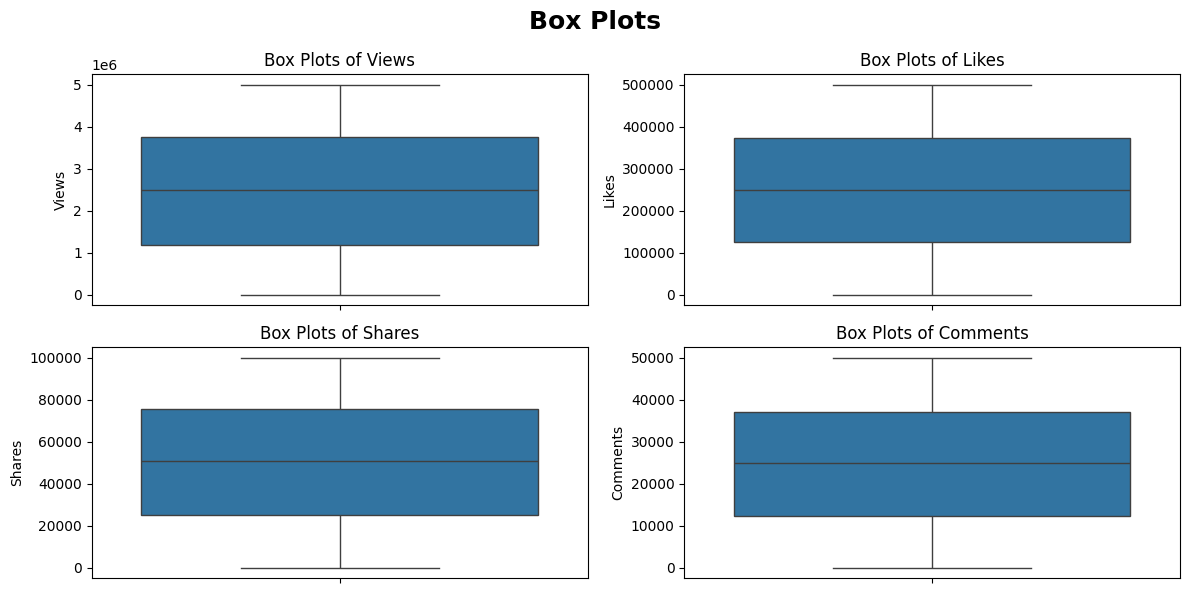

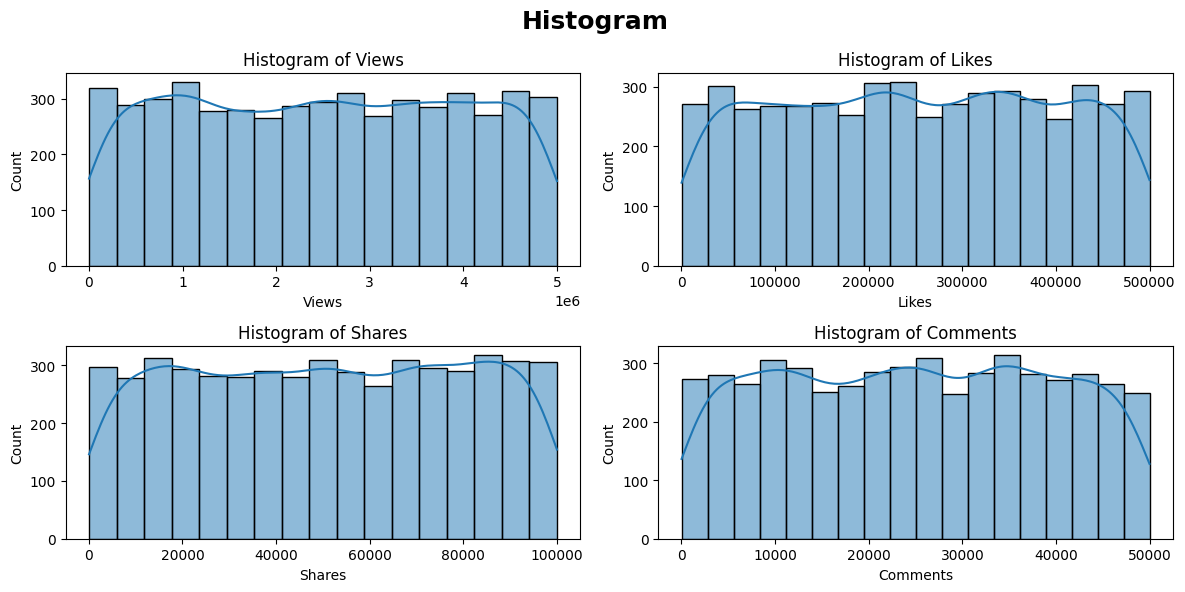

In [17]:
numeric_columns = ['Views', 'Likes', 'Shares', 'Comments'] # Kolom yang ingin Divisualisasi

# Membuat Function untuk membuat Box Plot
def create_boxplot(df, numeric_columns):    

    plt.figure(figsize=(12,6))

    for i, col in enumerate(numeric_columns, 1):


        plt.subplot(2, 2, i)
        sns.boxplot(data = df,
                         y = col
                         )
        
        plt.title(f'Box Plots of {col}')

    plt.suptitle('Box Plots', fontsize = 18, fontweight = 'bold')
        
    plt.tight_layout()
    plt.show()

# Membuat Function untuk membuat Histogram
def create_hitogram(df, numeric_columns):

    plt.figure(figsize=(12,6))

    for i, col in enumerate(numeric_columns, 1):

        plt.subplot(2,2,i)
        sns.histplot(data = df,
                     x = col,
                     kde = True)
        
        plt.title(f'Histogram of {col}')

    plt.suptitle('Histogram', fontsize = 18, fontweight = 'bold')

    plt.tight_layout()
    plt.show()

create_boxplot(df, numeric_columns)
create_hitogram(df, numeric_columns)
        

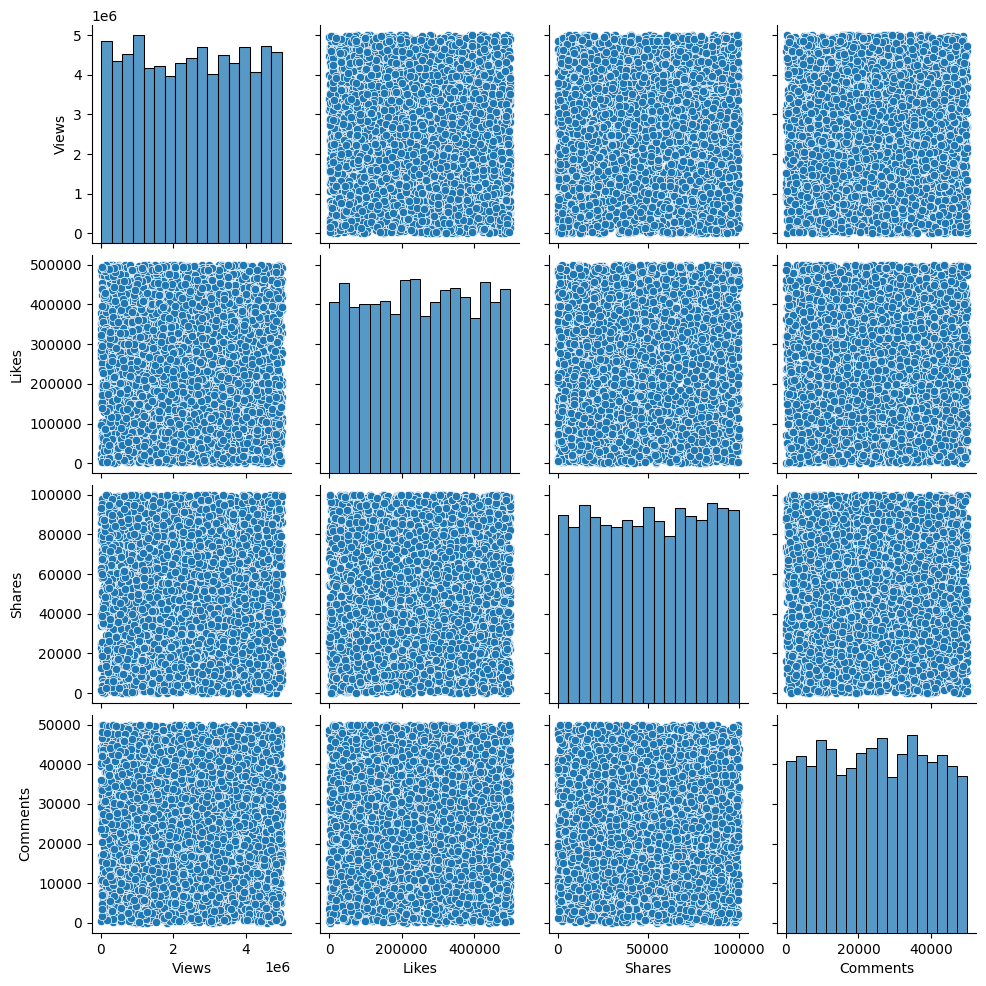

In [18]:
df_numeric = df._get_numeric_data()

#Melihat Korelasi / hubungan antara kolom views, likes, comments, share
sns.pairplot(df_numeric)

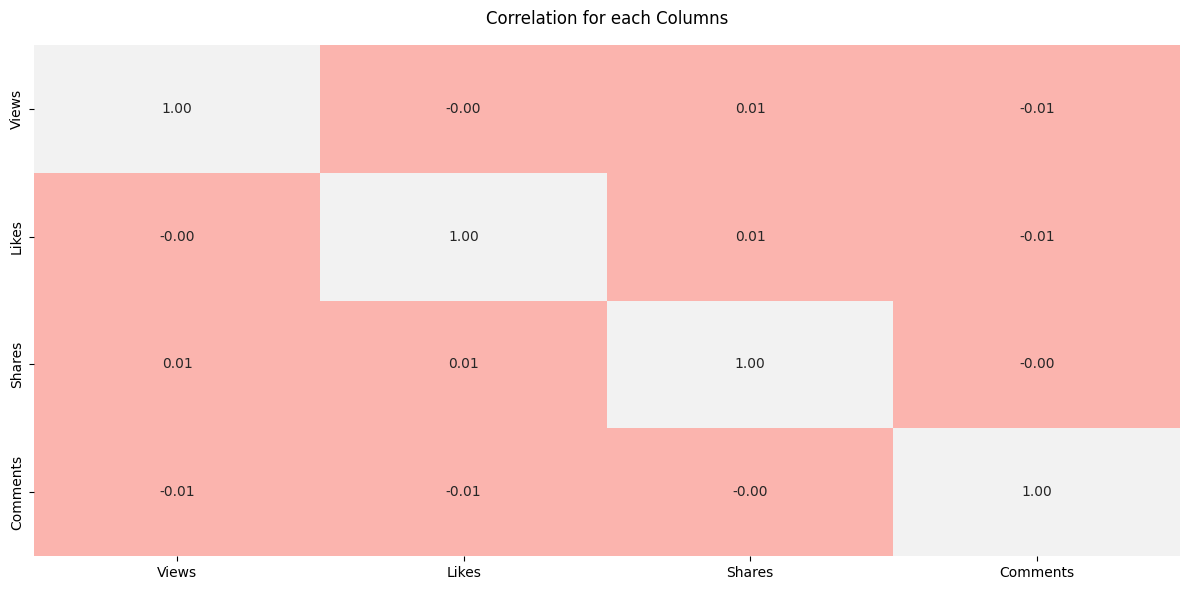

In [19]:
# Membuat Dataframe korelasi
df_corr = df_numeric.corr()

# Melihat Korelasi antara kolom
plt.figure(figsize=(12,6))
sns.heatmap(df_corr, cbar= False, annot= True, fmt= '.2f', cmap = 'Pastel1')

plt.title('Correlation for each Columns', pad = 15)
plt.tight_layout()

In [20]:
# Mengetahui Postingan anomali (Postingan dengan Comment, Likes, dan Share yang lebih tinggi daripaaa jumlah Views)

print(f'Jumlah post comment lebih banyak dari views : {len(df[df['Comments'] >= df['Views']])}')
print(f'Jumlah post Likes lebih banyak dari views : {len(df[df['Likes'] >= df['Views']])}')
print(f'Jumlah post Shares lebih banyak dari views : {len(df[df['Shares'] >= df['Views']])}')

Jumlah post comment lebih banyak dari views : 25
Jumlah post Likes lebih banyak dari views : 268
Jumlah post Shares lebih banyak dari views : 50


### Filter Data 

In [21]:
df_filtered = df.copy()

# Filter Dataframe dari Postingan Anomali
df_filtered = df_filtered[
    (df_filtered["Likes"] <= df_filtered["Views"]) &
    (df_filtered["Comments"] <= df_filtered["Views"]) &
    (df_filtered["Shares"] <= df_filtered["Views"])
]

In [22]:
#df_filtered.to_csv('Filtered_Data.csv')

In [23]:
#df_filtered = pd.read_csv('Filtered_Data.csv')

In [24]:
# Validasi

print(f'Jumlah post comment lebih banyak dari views : {len(df_filtered[df_filtered['Comments'] >= df_filtered['Views']])}')
print(f'Jumlah post Likes lebih banyak dari views : {len(df_filtered[df_filtered['Likes'] >= df_filtered['Views']])}')
print(f'Jumlah post Shares lebih banyak dari views : {len(df_filtered[df_filtered['Shares'] >= df_filtered['Views']])}')

Jumlah post comment lebih banyak dari views : 0
Jumlah post Likes lebih banyak dari views : 0
Jumlah post Shares lebih banyak dari views : 0


In [25]:
df_filtered = df_filtered.copy()

#Menambah Feature Engineering
df_filtered['Total_Engagement'] = df_filtered[['Likes', 'Shares', 'Comments']].sum(axis=1)
df_filtered['Engagement_Rate'] = (df_filtered['Total_Engagement'] / df_filtered['Views']).round(4)

df_filtered.head()

Post_ID   Platform     Hashtag Content_Type     Region    Views   Likes  \
0  Post_1     TikTok  #Challenge        Video         UK  4163464  339431   
1  Post_2  Instagram  #Education       Shorts      India  4155940  215240   
2  Post_3    Twitter  #Challenge        Video     Brazil  3666211  327143   
3  Post_4    YouTube  #Education       Shorts  Australia   917951  127125   
5  Post_6  Instagram  #Challenge       Shorts  Australia  1323566  136282   

   Shares  Comments Engagement_Level  Total_Engagement  Engagement_Rate  
0   53135     19346             High            411912             0.10  
1   65860     27239           Medium            308339             0.07  
2   39423     36223           Medium            402789             0.11  
3   11687     36806              Low            175618             0.19  
5   86979     47129              Low            270390             0.20

In [26]:
numeric_columns_2 = numeric_columns + ['Total_Engagement', 'Engagement_Rate']

# Membuat Function extract number
def format_large_numbers(x, pos):
    if abs(x) >= 1000000:
        return f'{x / 1000000:.3f}M'
    elif abs(x) >= 1000:
        return f'{x / 1000:.3f}K'
    elif 0 < abs(x) < 1:
        return f'{x:.3f}' 
    elif -1 < x < 0:
        return f'{x:.3f}' 
    else:
        return f'{x:.0f}'

# Membuat function visualisasi bar plot
def engagement_plot(df, numeric_columns_2, col_1):
    
    plt.figure(figsize=(18,15))

    for i, col in enumerate(numeric_columns_2, 1):

        grouped_data = df.groupby(col_1)[col].mean().sort_values(ascending=False).reset_index()

        plt.subplot(3, 2, i)
        ax = sns.barplot(data = grouped_data,
                         x = col_1,
                         y = col,
                         hue = col_1,
                         errorbar = None,
                         palette= 'viridis')

        plt.title(f'Average {col} for Each {col_1}')
        plt.xlabel(None)
        plt.ylabel(f'{col}')

        plt.xticks(fontsize=11, rotation = 45)
        plt.yticks(fontsize=11)

        for container in ax.containers:
            labels = [format_large_numbers(v.get_height(), i) for v in container]
            ax.bar_label(container, labels=labels, label_type='center', fontsize=9, fontweight='bold', color='white')

    plt.suptitle(f'Comparison Engagement of {col_1}', fontsize = 20, fontweight = 'bold')

    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()

In [27]:
# Membuat function untuk membuat visualisasi Total Post
def total_post(df, col_target):

    order = df[col_target].value_counts().index
    
    plt.figure(figsize=(12,6))

    ax2 = sns.countplot(data = df,
              x = col_target,
              order= order,
              palette= 'pastel',
              hue = col_target)

    plt.title(f'Total Post per {col_target}')
    plt.ylabel('Total Post')

    for container in ax2.containers:
        ax2.bar_label(container, fmt = '%.0f', label_type= 'edge', padding = 3)

    plt.tight_layout()
    plt.show()

## Average Engagement by Platforms

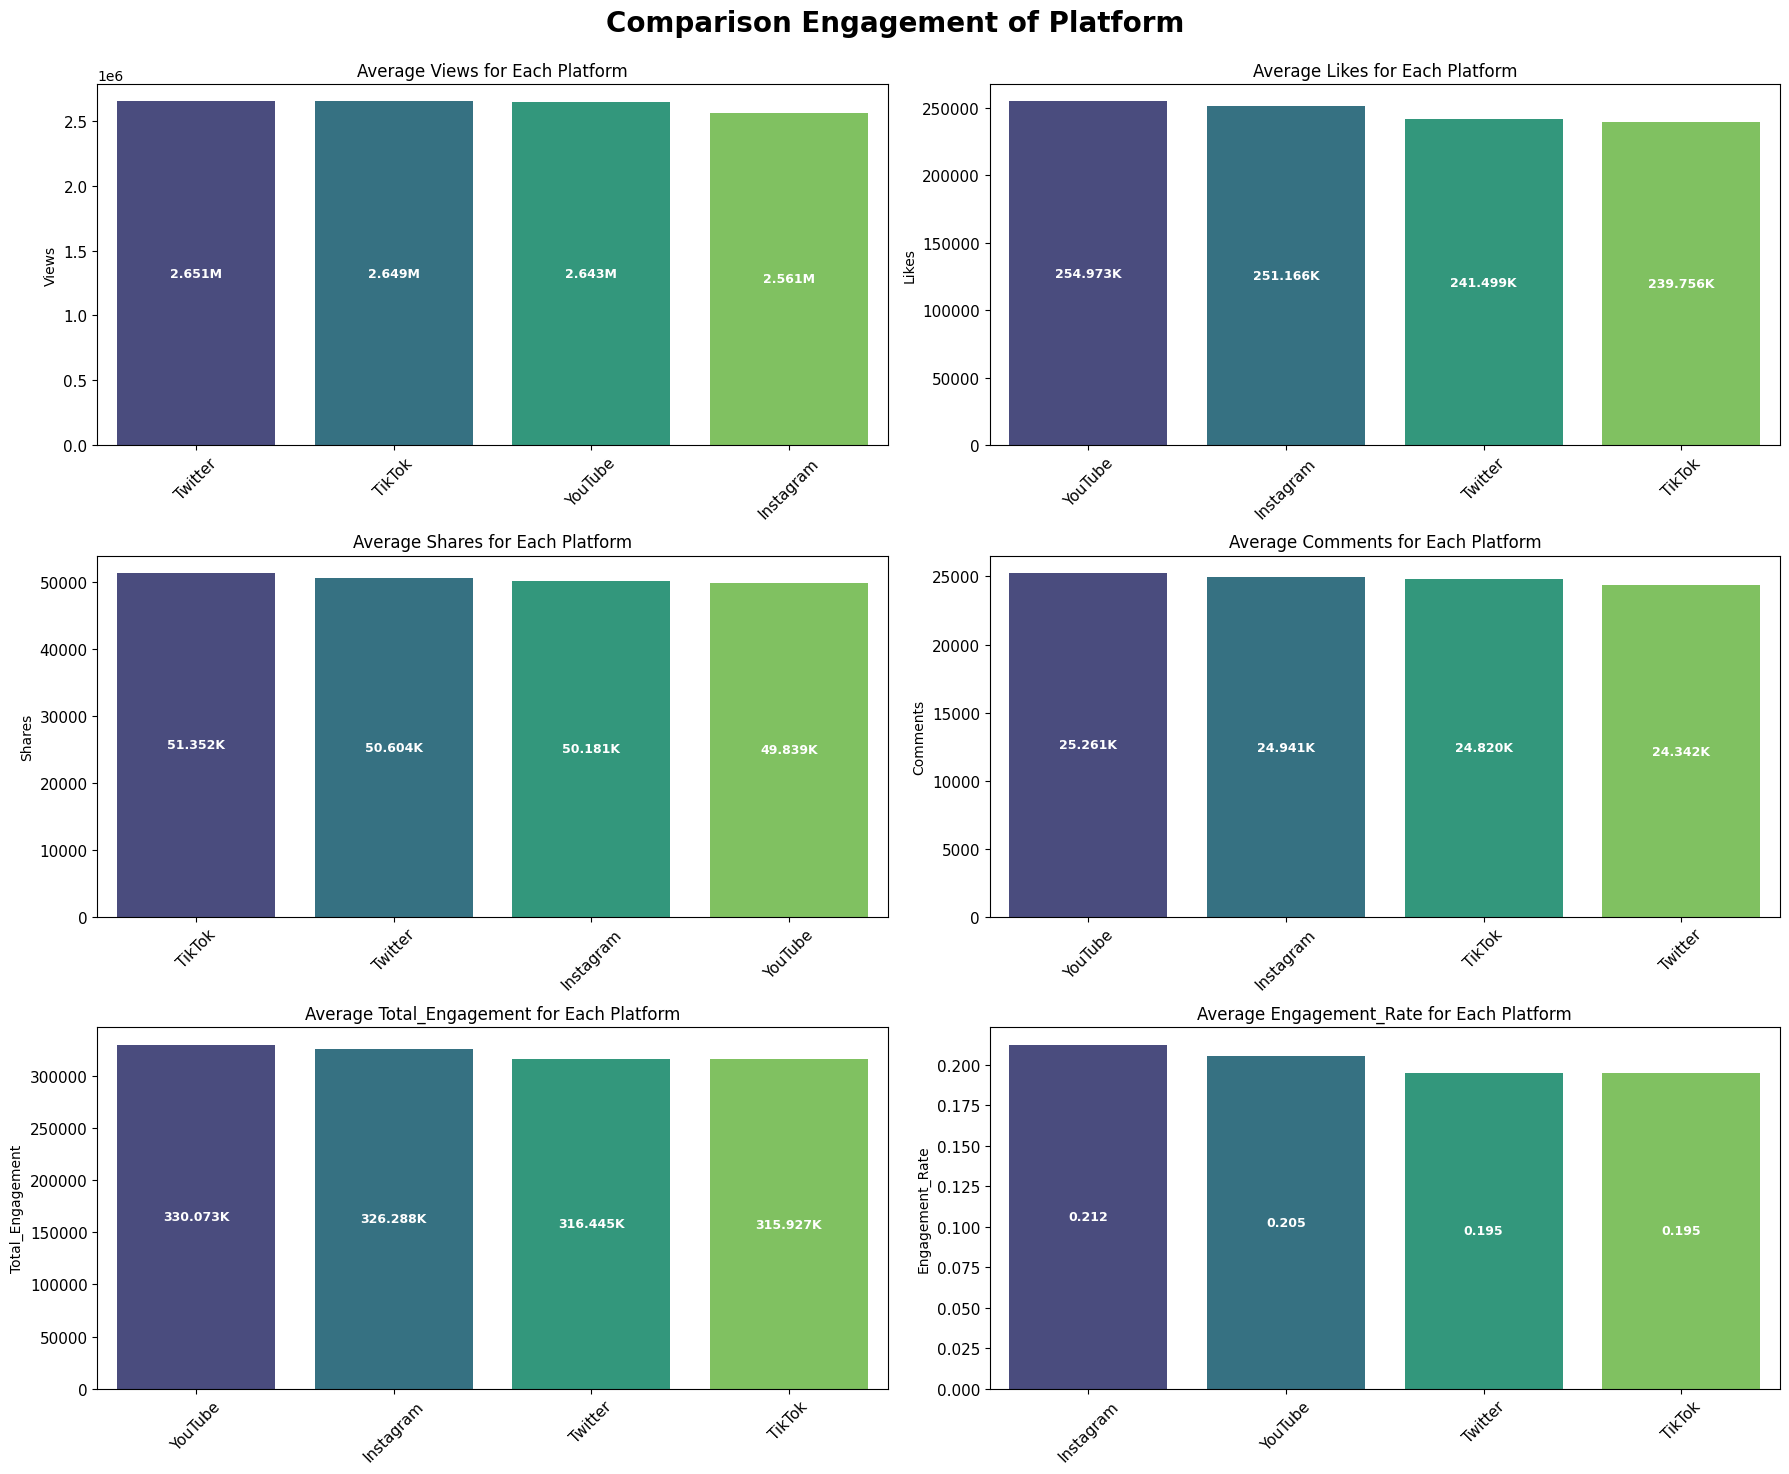

In [28]:
engagement_plot(df_filtered, numeric_columns_2, 'Platform')

Twitter paling unggul dalam menjangkau banyak orang, tapi engagement penggunanya tidak sedalam platform lain. YouTube dan Instagram punya interaksi yang lebih kuat, menunjukkan bahwa pengguna lebih aktif untuk memberi komentar, like, dan share. TikTok unggul dalam hal konten yang mudah dibagikan, tapi kurang dalam engagement rate.

Secara keseluruhan, Instagram jadi platform paling efektif untuk membangun interaksi yang nyata dari audiens.

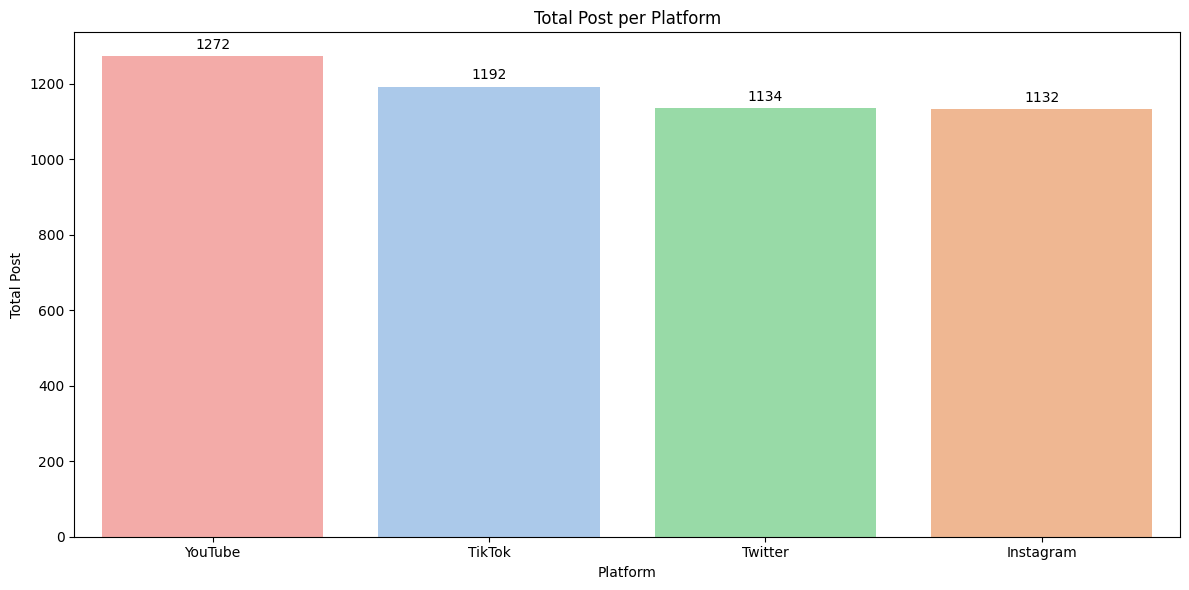

In [29]:
total_post(df_filtered, 'Platform')

## Average Engagement by Content_Type

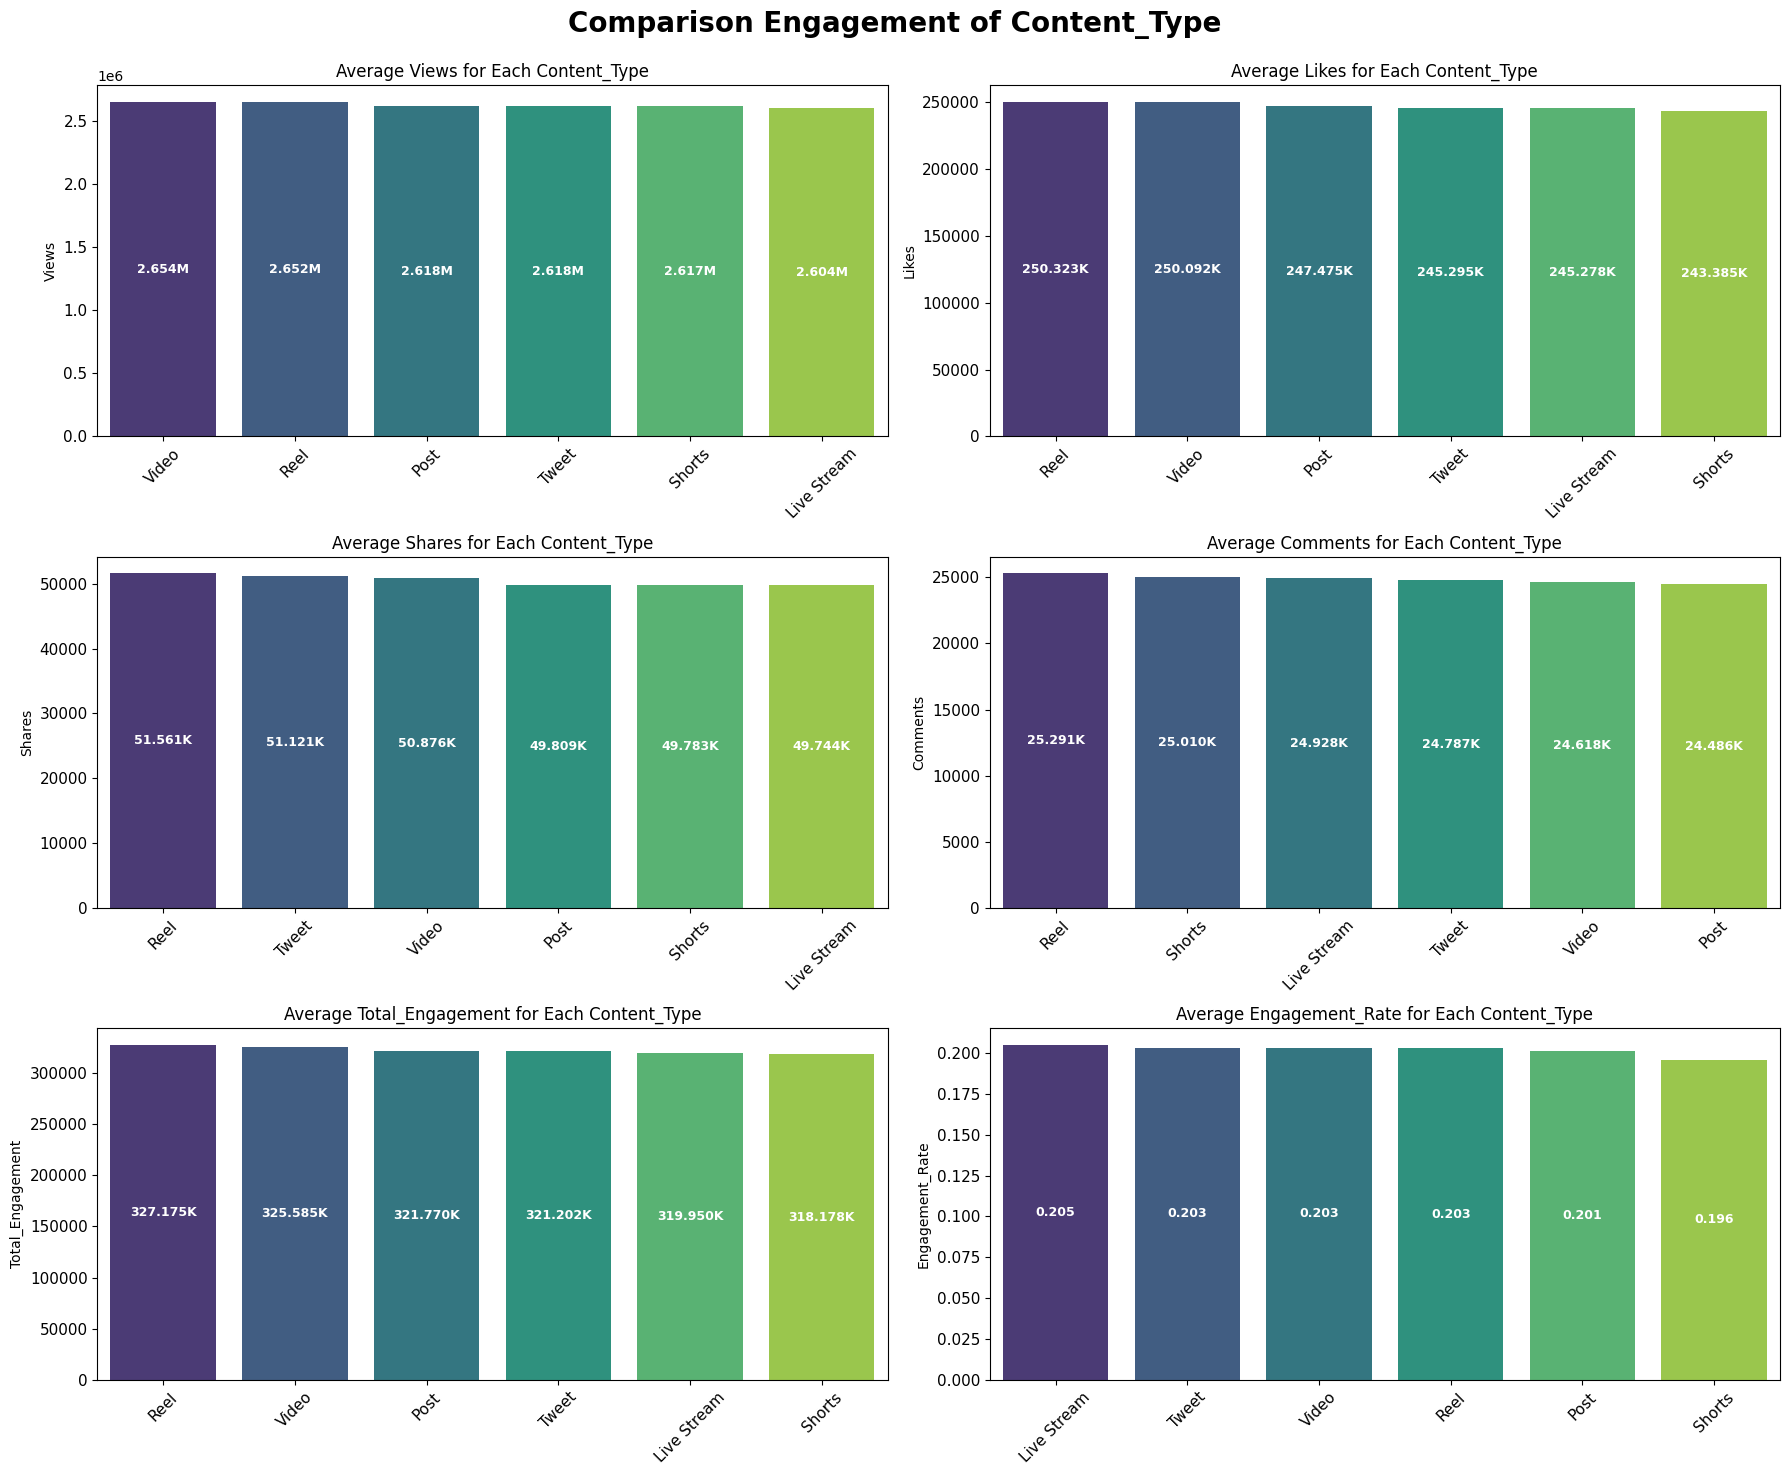

In [30]:
engagement_plot(df_filtered, numeric_columns_2, 'Content_Type')

Video menjadi konten yang mampu menjangkau audiens paling luas dibandingkan jenis konten lainnya. Namun, dari sisi engagement (Like, Comment, dan Share), content Reel mendominasi di semua metrik pengukuran interaksi.

Yang menarik, jika dilihat dari Engagement_Rate, semua jenis konten memiliki tingkat yang hampir sama dengan perbedaan yang tidak terlalu signifikan. Content Live Stream memimpin dengan Engagement_Rate sedikit lebih tinggi dibandingkan content lainnya. Hal ini kemungkinan karena meskipun jumlah views pada Live Stream lebih sedikit, namun audiens yang mengaksesnya cenderung sudah memiliki ketertarikan terhadap konten tersebut, sehingga proporsi interaksinya menjadi lebih tinggi dibandingkan content lainnya meski perbedaannya tidak terlalu besar.

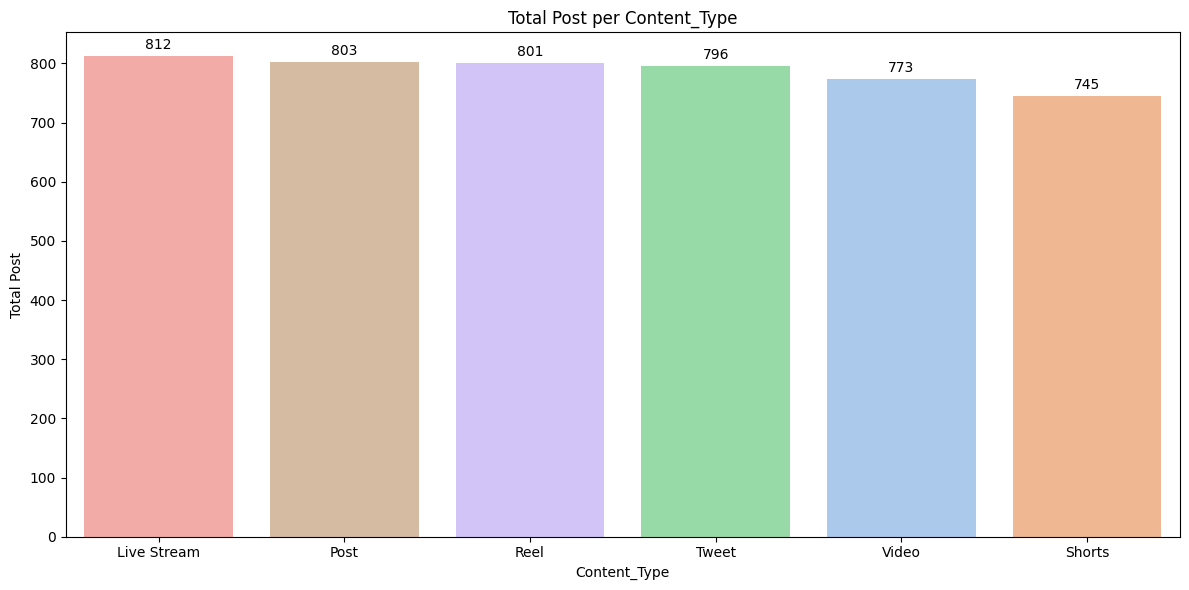

In [31]:
total_post(df_filtered, 'Content_Type')

Grafik menunjukkan distribusi merata antara jenis konten, dengan Live Stream sedikit lebih tinggi dari yang lain. Jika dikaitkan dengan informasi sebelumnya tentang engagement rate, Live Stream tidak hanya memiliki jumlah posting tertinggi, tetapi juga engagement rate tertinggi. **Hal ini menunjukkan bahwa konten Live Stream tidak hanya dilakukan / diunggah dalam jumlah banyak tetapi juga efektif dalam menghasilkan interaksi dengan audiens.**

## Average Engagement by Region

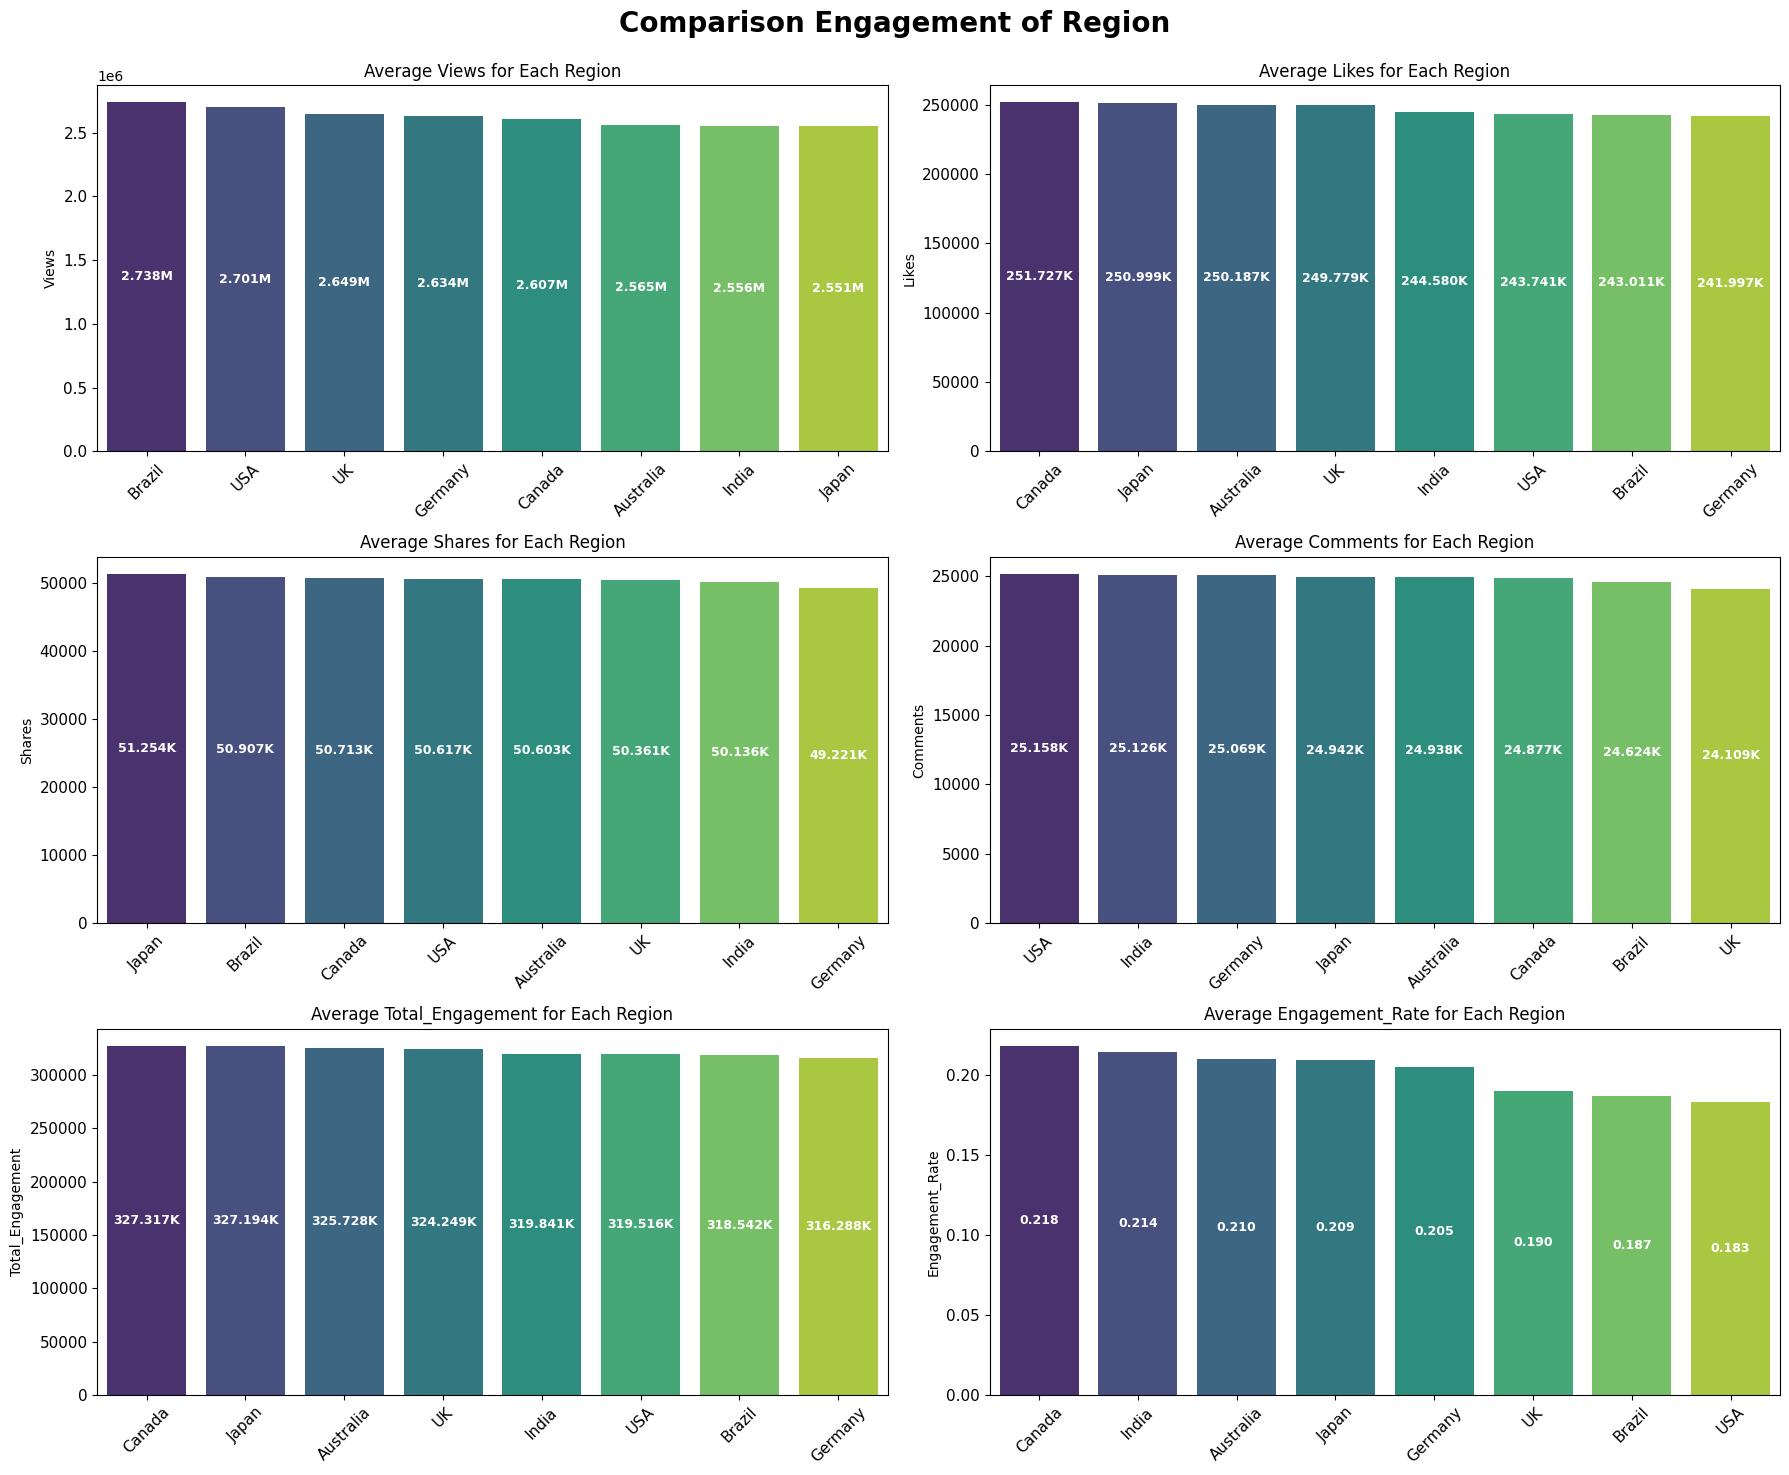

In [32]:
engagement_plot(df_filtered, numeric_columns_2, 'Region')

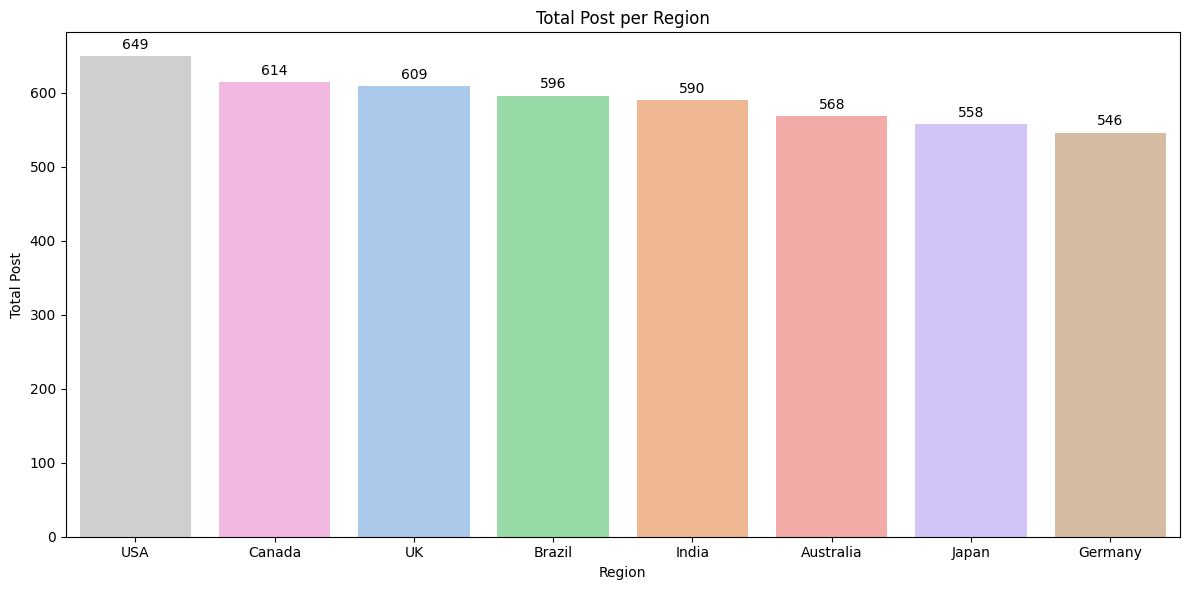

In [33]:
total_post(df_filtered, 'Region')

## Average Engagement by Hashtag

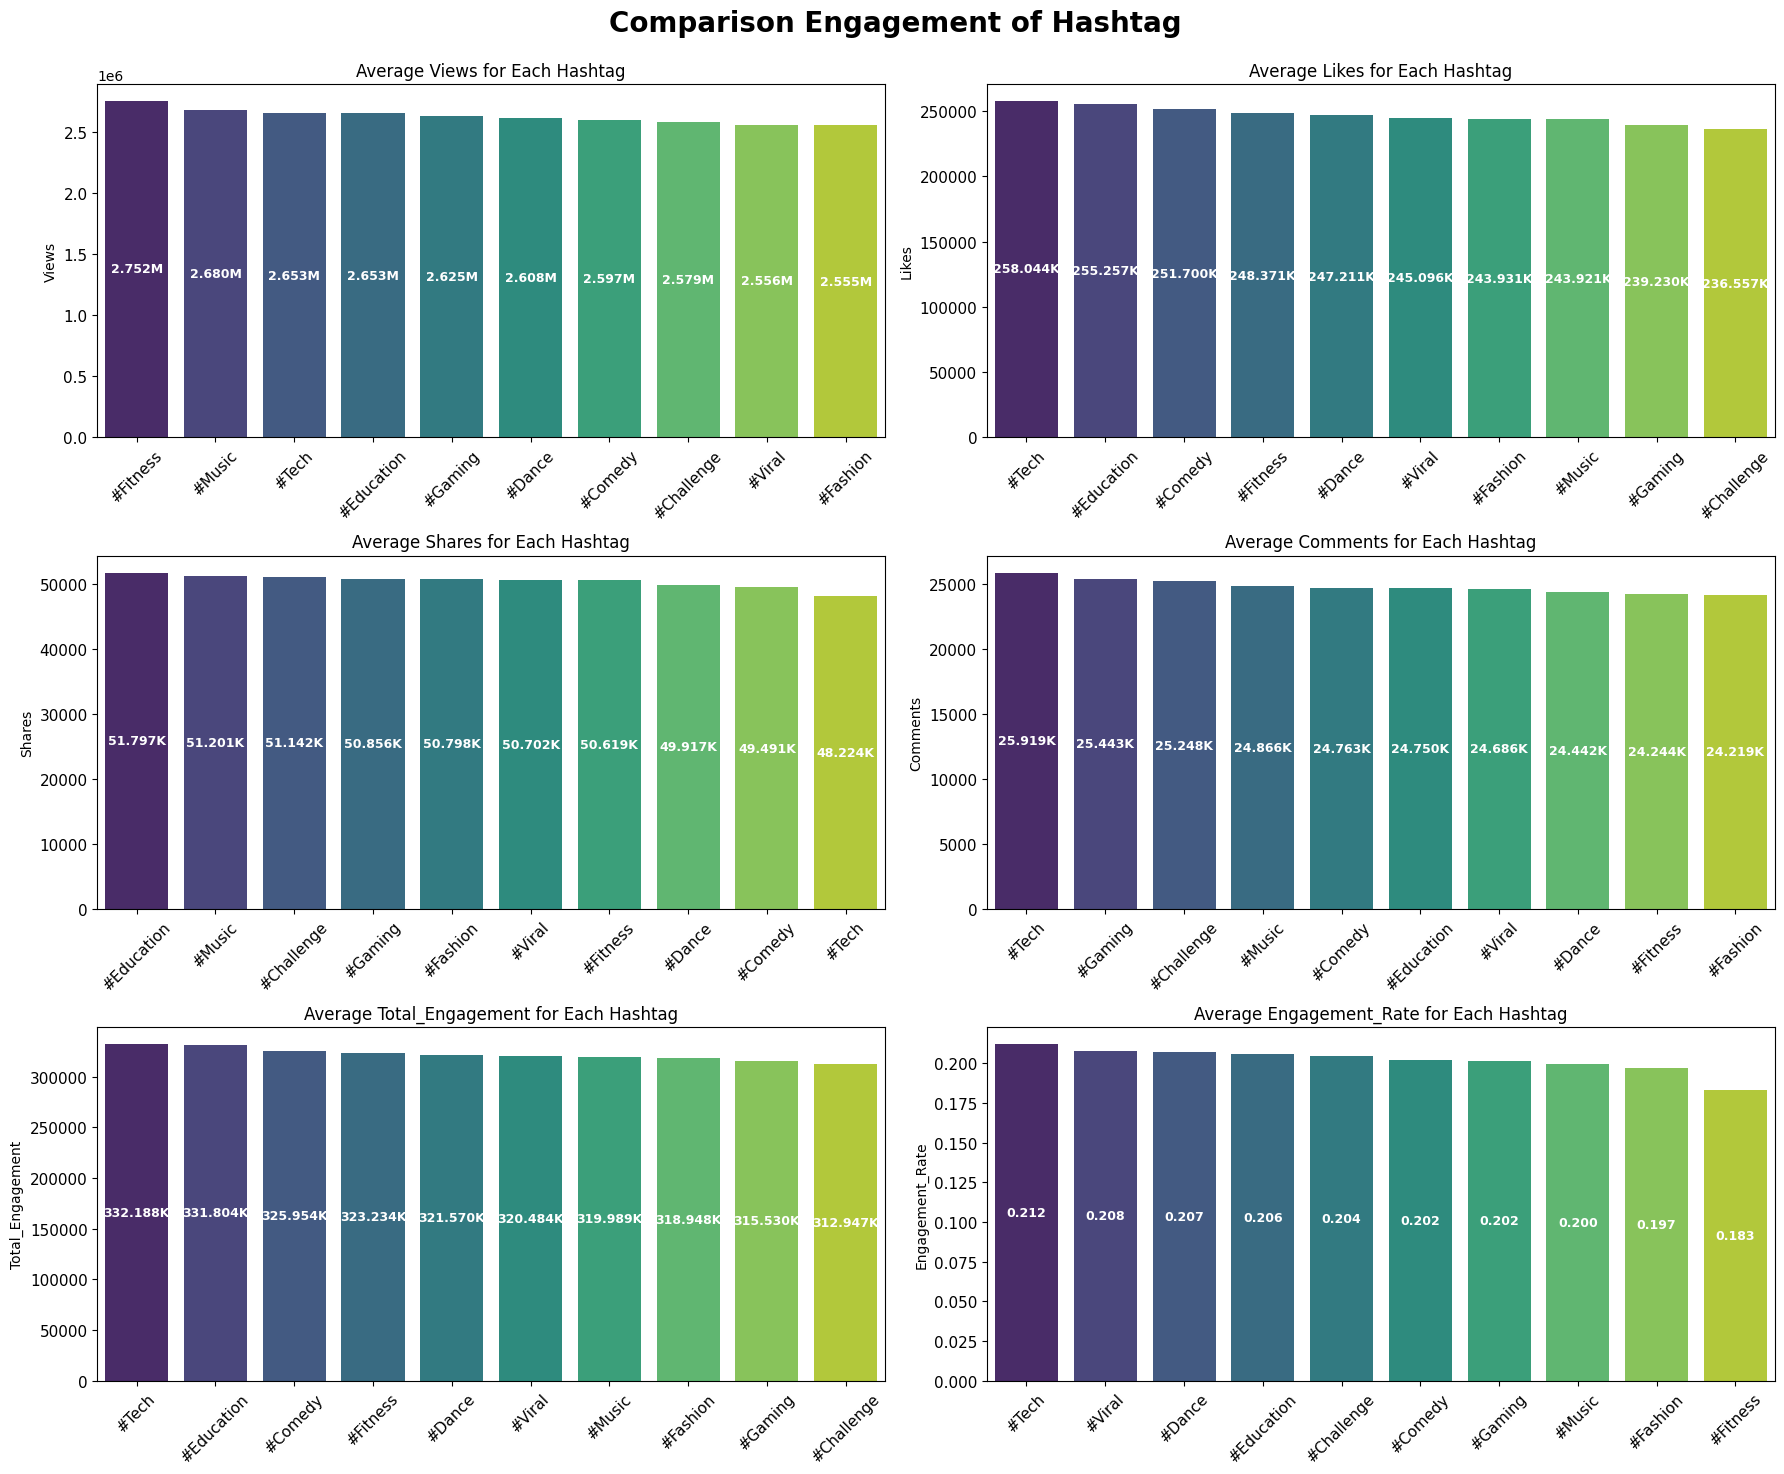

In [34]:
engagement_plot(df_filtered, numeric_columns_2, 'Hashtag')

#Tech mendominasi sebagai hashtag terpopuler dengan performa unggul di berbagai metrik dengan menempati peringkat pertama untuk Likes, Comments, total engagement (Like + Share + Comment), dan Engagement Rate, serta peringkat ketiga untuk Views. Meskipun lemah dalam metrik Share, hal ini tidak mengurangi kepopulerannya secara keseluruhan. Sementara itu, #Viral menunjukkan fenomena menarik dengan Engagement Rate tertinggi kedua meskipun Views dan total engagement tidak terlalu tinggi, muncul hipotesa bahwa postingan #Viral sedikit tapi dapat meng-engage banyak orang.  

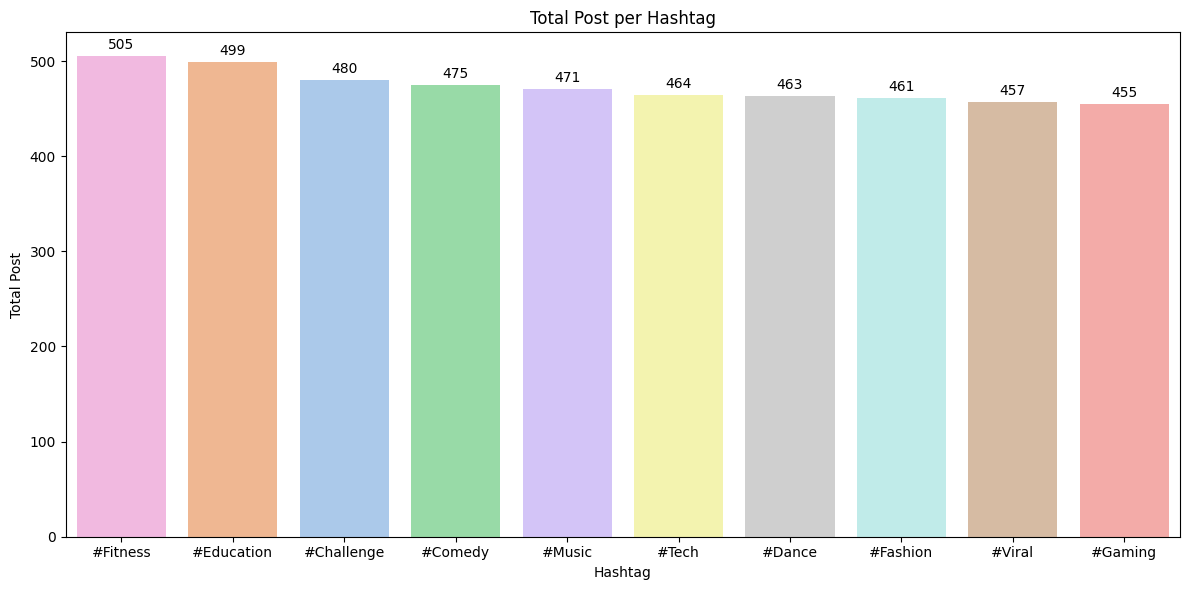

In [35]:
total_post(df_filtered, 'Hashtag')

#Fitness menjadi yang paling banyak digunakan dalam postingan, sehingga menghasilkan jumlah views tertinggi di antara semua hashtag. Tingginya volume postingan ini berkontribusi besar terhadap tingginya eksposur dan jangkauan. Sebaliknya, #Tech dan #Viral justru menunjukkan jumlah postingannya relatif sedikit, meskipun Engagement Rate yang paling tinggi. Hal ini mengindikasikan bahwa meskipun tidak sepopuler dari segi kuantitas, konten yang menggunakan #Tech dan #Viral cenderung lebih relevan, menarik, atau berkualitas tinggi bagi audiensnya.

In [36]:
top_views = df_filtered.sort_values(by= 'Views', ascending= False).head(10).reset_index(drop=True)

print('Top 10 Posting dengan Jumlah Views Terbanyak')
print('\n')
print(top_views[['Post_ID', 'Platform', 'Hashtag', 'Content_Type', 'Views']])

Top 10 Posting dengan Jumlah Views Terbanyak


     Post_ID   Platform     Hashtag Content_Type    Views
0   Post_676    YouTube      #Dance  Live Stream  4999430
1  Post_2601    YouTube       #Tech  Live Stream  4999077
2  Post_1842  Instagram      #Music         Reel  4997766
3   Post_651    Twitter  #Challenge         Post  4997429
4  Post_3604     TikTok      #Dance        Video  4997284
5  Post_2578    Twitter  #Education         Post  4996111
6  Post_1882    YouTube  #Challenge         Post  4995973
7  Post_1465    YouTube    #Fitness       Shorts  4995243
8  Post_2009    YouTube     #Comedy        Video  4995038
9  Post_1381    YouTube    #Fitness         Reel  4993673


In [37]:
top_Likes = df_filtered.sort_values(by= 'Likes', ascending= False).head(10).reset_index(drop=True)

print('Top 10 Posting dengan Jumlah Likes Terbanyak')
print('\n')
print(top_Likes[['Post_ID', 'Platform', 'Hashtag', 'Content_Type', 'Likes']])

Top 10 Posting dengan Jumlah Likes Terbanyak


     Post_ID   Platform     Hashtag Content_Type   Likes
0  Post_3134     TikTok    #Fitness       Shorts  499922
1  Post_2522    YouTube    #Fitness         Post  499874
2  Post_1545    YouTube     #Gaming       Shorts  499704
3  Post_4949  Instagram     #Comedy  Live Stream  499559
4  Post_1248     TikTok     #Comedy  Live Stream  499380
5  Post_3318  Instagram  #Education         Reel  499312
6  Post_4372    Twitter    #Fashion        Tweet  499309
7  Post_3929  Instagram     #Gaming       Shorts  499249
8  Post_2493    Twitter    #Fashion         Reel  499236
9  Post_2010    YouTube      #Viral  Live Stream  499175


In [38]:
top_Comments = df_filtered.sort_values(by= 'Comments', ascending= False).head(10).reset_index(drop=True)

print('Top 10 Posting dengan Jumlah Comments Terbanyak')
print('\n')
print(top_Comments[['Post_ID', 'Platform', 'Hashtag', 'Content_Type', 'Comments']])

Top 10 Posting dengan Jumlah Comments Terbanyak


     Post_ID   Platform     Hashtag Content_Type  Comments
0  Post_1668     TikTok  #Education       Shorts     49993
1   Post_181    Twitter      #Viral       Shorts     49953
2  Post_3752     TikTok      #Dance       Shorts     49951
3  Post_4564     TikTok     #Gaming  Live Stream     49938
4  Post_4308     TikTok    #Fitness  Live Stream     49935
5  Post_1413    YouTube     #Gaming  Live Stream     49929
6  Post_1182    Twitter       #Tech         Post     49900
7  Post_3838  Instagram    #Fashion        Tweet     49898
8  Post_3885     TikTok      #Dance       Shorts     49887
9  Post_1115     TikTok     #Comedy  Live Stream     49881


In [39]:
top_Shares = df_filtered.sort_values(by= 'Shares', ascending= False).head(10).reset_index(drop=True)

print('Posting dengan Jumlah Shares Terbanyak')
print('\n')
print(top_Shares[['Post_ID', 'Platform', 'Hashtag', 'Content_Type', 'Shares']])

Posting dengan Jumlah Shares Terbanyak


     Post_ID   Platform     Hashtag Content_Type  Shares
0   Post_792     TikTok      #Music        Tweet   99978
1  Post_4366    Twitter     #Comedy  Live Stream   99953
2  Post_1075    YouTube    #Fashion         Post   99926
3  Post_4627    YouTube       #Tech         Reel   99903
4  Post_3290     TikTok     #Gaming  Live Stream   99902
5  Post_2158  Instagram      #Viral        Video   99894
6  Post_3873    Twitter      #Music         Post   99889
7  Post_3114     TikTok      #Music         Reel   99873
8  Post_4599    YouTube  #Education         Post   99857
9  Post_1130    Twitter      #Dance  Live Stream   99856


# Normalize Data

In [40]:
feature_to_scale = numeric_columns_2

df_scale = df_filtered.copy()

scaler = StandardScaler()

df_scale[feature_to_scale] = scaler.fit_transform(df_filtered[feature_to_scale])

df_scale

Post_ID   Platform     Hashtag Content_Type     Region  Views  Likes  \
0        Post_1     TikTok  #Challenge        Video         UK   1.11   0.64   
1        Post_2  Instagram  #Education       Shorts      India   1.10  -0.22   
2        Post_3    Twitter  #Challenge        Video     Brazil   0.75   0.56   
3        Post_4    YouTube  #Education       Shorts  Australia  -1.23  -0.83   
5        Post_6  Instagram  #Challenge       Shorts  Australia  -0.94  -0.77   
...         ...        ...         ...          ...        ...    ...    ...   
4995  Post_4996    YouTube  #Education        Video      Japan   1.18   0.93   
4996  Post_4997  Instagram  #Education        Video         UK   1.60  -0.56   
4997  Post_4998    YouTube    #Fashion       Shorts        USA  -0.45  -1.49   
4998  Post_4999  Instagram     #Gaming       Shorts     Canada  -0.29  -1.39   
4999  Post_5000  Instagram    #Fashion         Reel      Japan  -0.29  -1.21   

      Shares  Comments Engagement_Level  Total_Engagement  Engagement_Rate  
0       0.09     -0.39             High              0.61            -0.46  
1       0.53      0.17           Medium             -0.09            -0.57  
2      -0.38      0.79           Medium              0.54            -0.41  
3      -1.34      0.84              Low             -0.99            -0.05  
5       1.26      1.56              Low             -0.35             0.01  
...      ...       ...              ...               ...              ...  
4995    0.30     -1.41             High              0.83            -0.44  
4996    0.15     -1.40           Medium             -0.65            -0.69  
4997    0.85      0.63              Low             -1.22            -0.59  
4998   -1.29      1.26              Low             -1.48            -0.70  
4999   -0.71      1.51              Low             -1.17            -0.60  

[4730 rows x 12 columns]

In [41]:
kmeans_data = df_filtered['Engagement_Rate'].values.reshape(-1,1)

num_clusters = np.arange(2,11)

def find_inertia_sil_score(data, num_clusters):

    inertia = []
    sil_score = []

    for num in num_clusters:
        kms = KMeans(n_clusters= num, random_state= 42).fit(data)
        inertia.append(kms.inertia_)
        sil_score.append(silhouette_score(data, kms.labels_))

    return inertia, sil_score
    
inertia, sil_score = find_inertia_sil_score(kmeans_data, num_clusters)

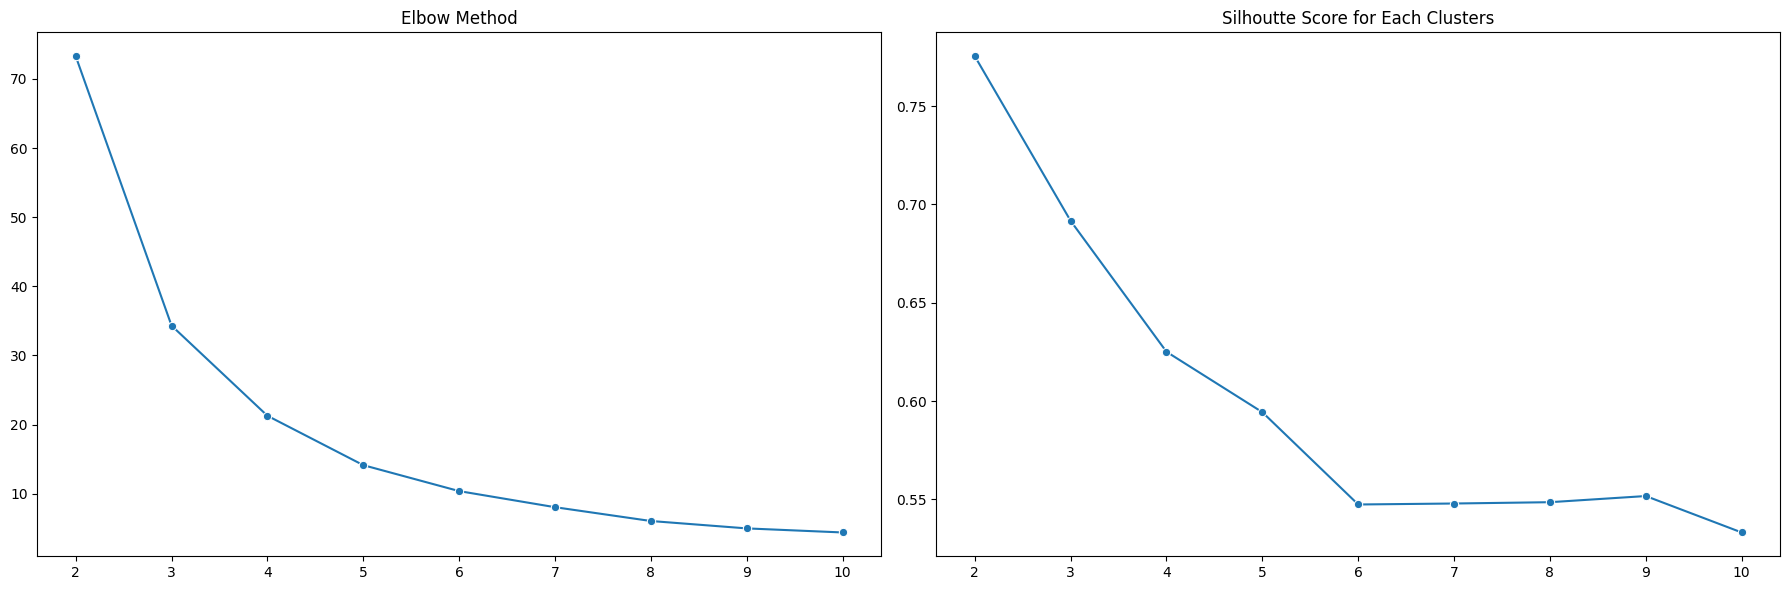

In [42]:
plt.figure(figsize=(18,6))


plt.subplot(1,2,1)
sns.lineplot(x = num_clusters, y = inertia, marker = 'o')
plt.title('Elbow Method')

plt.subplot(1,2,2)
sns.lineplot(x = num_clusters, y = sil_score, marker = 'o')
plt.title('Silhoutte Score for Each Clusters')

plt.tight_layout()

plt.savefig('K-Means Evaluation.png', dpi = 300)

plt.show()



Dari Hasil Elbow Method dan Silhoutte Score, Cluster 2 dan 3 menjadi Cluster yang terbaik untuk mengklasifikasikan Postingan berdasarkan Engagement Rate. Pada analisis ini, nomor clustering yang akan diambil adalah **3 Cluster**

In [43]:
# Membuat 3 Clustering

kmeans_3 = KMeans(n_clusters= 3, random_state= 42).fit(kmeans_data)

df_filtered['Engagement_Rate_Level'] = kmeans_3.fit_predict(kmeans_data)

In [44]:
# Melihat hasil Clustering K-Means (Ditinjau dari Engagement_Rate) 

df_filtered.groupby('Engagement_Rate_Level').mean(numeric_only= True).round(2)

Views     Likes   Shares  Comments  \
Engagement_Rate_Level                                           
0                     3131430.26 227678.67 49715.74  24535.44   
1                      428410.80 295208.16 58358.42  24772.07   
2                     1089635.65 316728.54 51467.94  26261.69   

                       Total_Engagement  Engagement_Rate  
Engagement_Rate_Level                                     
0                             301929.85             0.11  
1                             378338.64             0.95  
2                             394458.17             0.39

Hasil Clustering K-Means

0 : Views tinggi, namun Likes, Shares, Comments, Engagement Rate **rendah**

1 : Views rendah, namun Likes, Shares, Comments, Engagement Rate **tinggi**

2 : Views sedang, Likes, Shares, Comments, Engagement Rate **sedang**

Maka dengan ini:

0 : Low

1 : High

2 : Medium

In [45]:
print(f'Jumlah Clustering K-Means: {df_filtered['Engagement_Rate_Level'].value_counts()}')

Jumlah Clustering K-Means: Engagement_Rate_Level
0    3643
2     835
1     252
Name: count, dtype: int64


In [46]:
# Menghapus kategori Engagement_Level 
df_filtered.drop(columns= ['Engagement_Level'], inplace= True)

In [47]:
# Mengurut Cluster / Kategori 

df_filtered['Engagement_Rate_Level'] = df_filtered['Engagement_Rate_Level'].map({
    0 : 0, #Low
    1 : 2, #High
    2 : 1 # Medium
})

In [48]:
#df_filtered.to_csv('Filtered Data with KMeans.csv')

# A/B Testing (Validation)

In [49]:
group_a = df_filtered[df_filtered['Engagement_Rate_Level'] == 2][numeric_columns] # High
group_b = df_filtered[df_filtered['Engagement_Rate_Level'] == 0][numeric_columns] # Low

from scipy.stats import ttest_ind

p_values = {}
t_stats = {}

for col in numeric_columns:
    a_col = group_a[col] 
    b_col = group_b[col]  
    
    t_stat, p_val = ttest_ind(a_col, b_col)
    
    t_stats[col] = t_stat
    p_values[col] = p_val
    
    print(f'p value for {col}: {p_val:.4f}')

p value for Views: 0.0000
p value for Likes: 0.0000
p value for Shares: 0.0000
p value for Comments: 0.7997


Dari hasil segmentasi Engagement Rate dengan K-Means, dibandingkan dua klaster ekstrem: Group A (High Engagement Rate, Views rendah) dan Group B (Low Engagement Rate, Views tinggi). A/B testing menggunakan uji t-test menunjukkan perbedaan signifikan pada Views (p = 0.0000), Likes (p = 0.0000), dan Shares (p = 0.0000), serta tidak signifikan pada Comments (p = 0.7997). Ini memvalidasi bahwa segmentasi K-Means berhasil memisahkan kelompok dengan pola interaksi pengguna yang berbeda secara nyata, bukan sekadar hasil dari formula Engagement Rate.

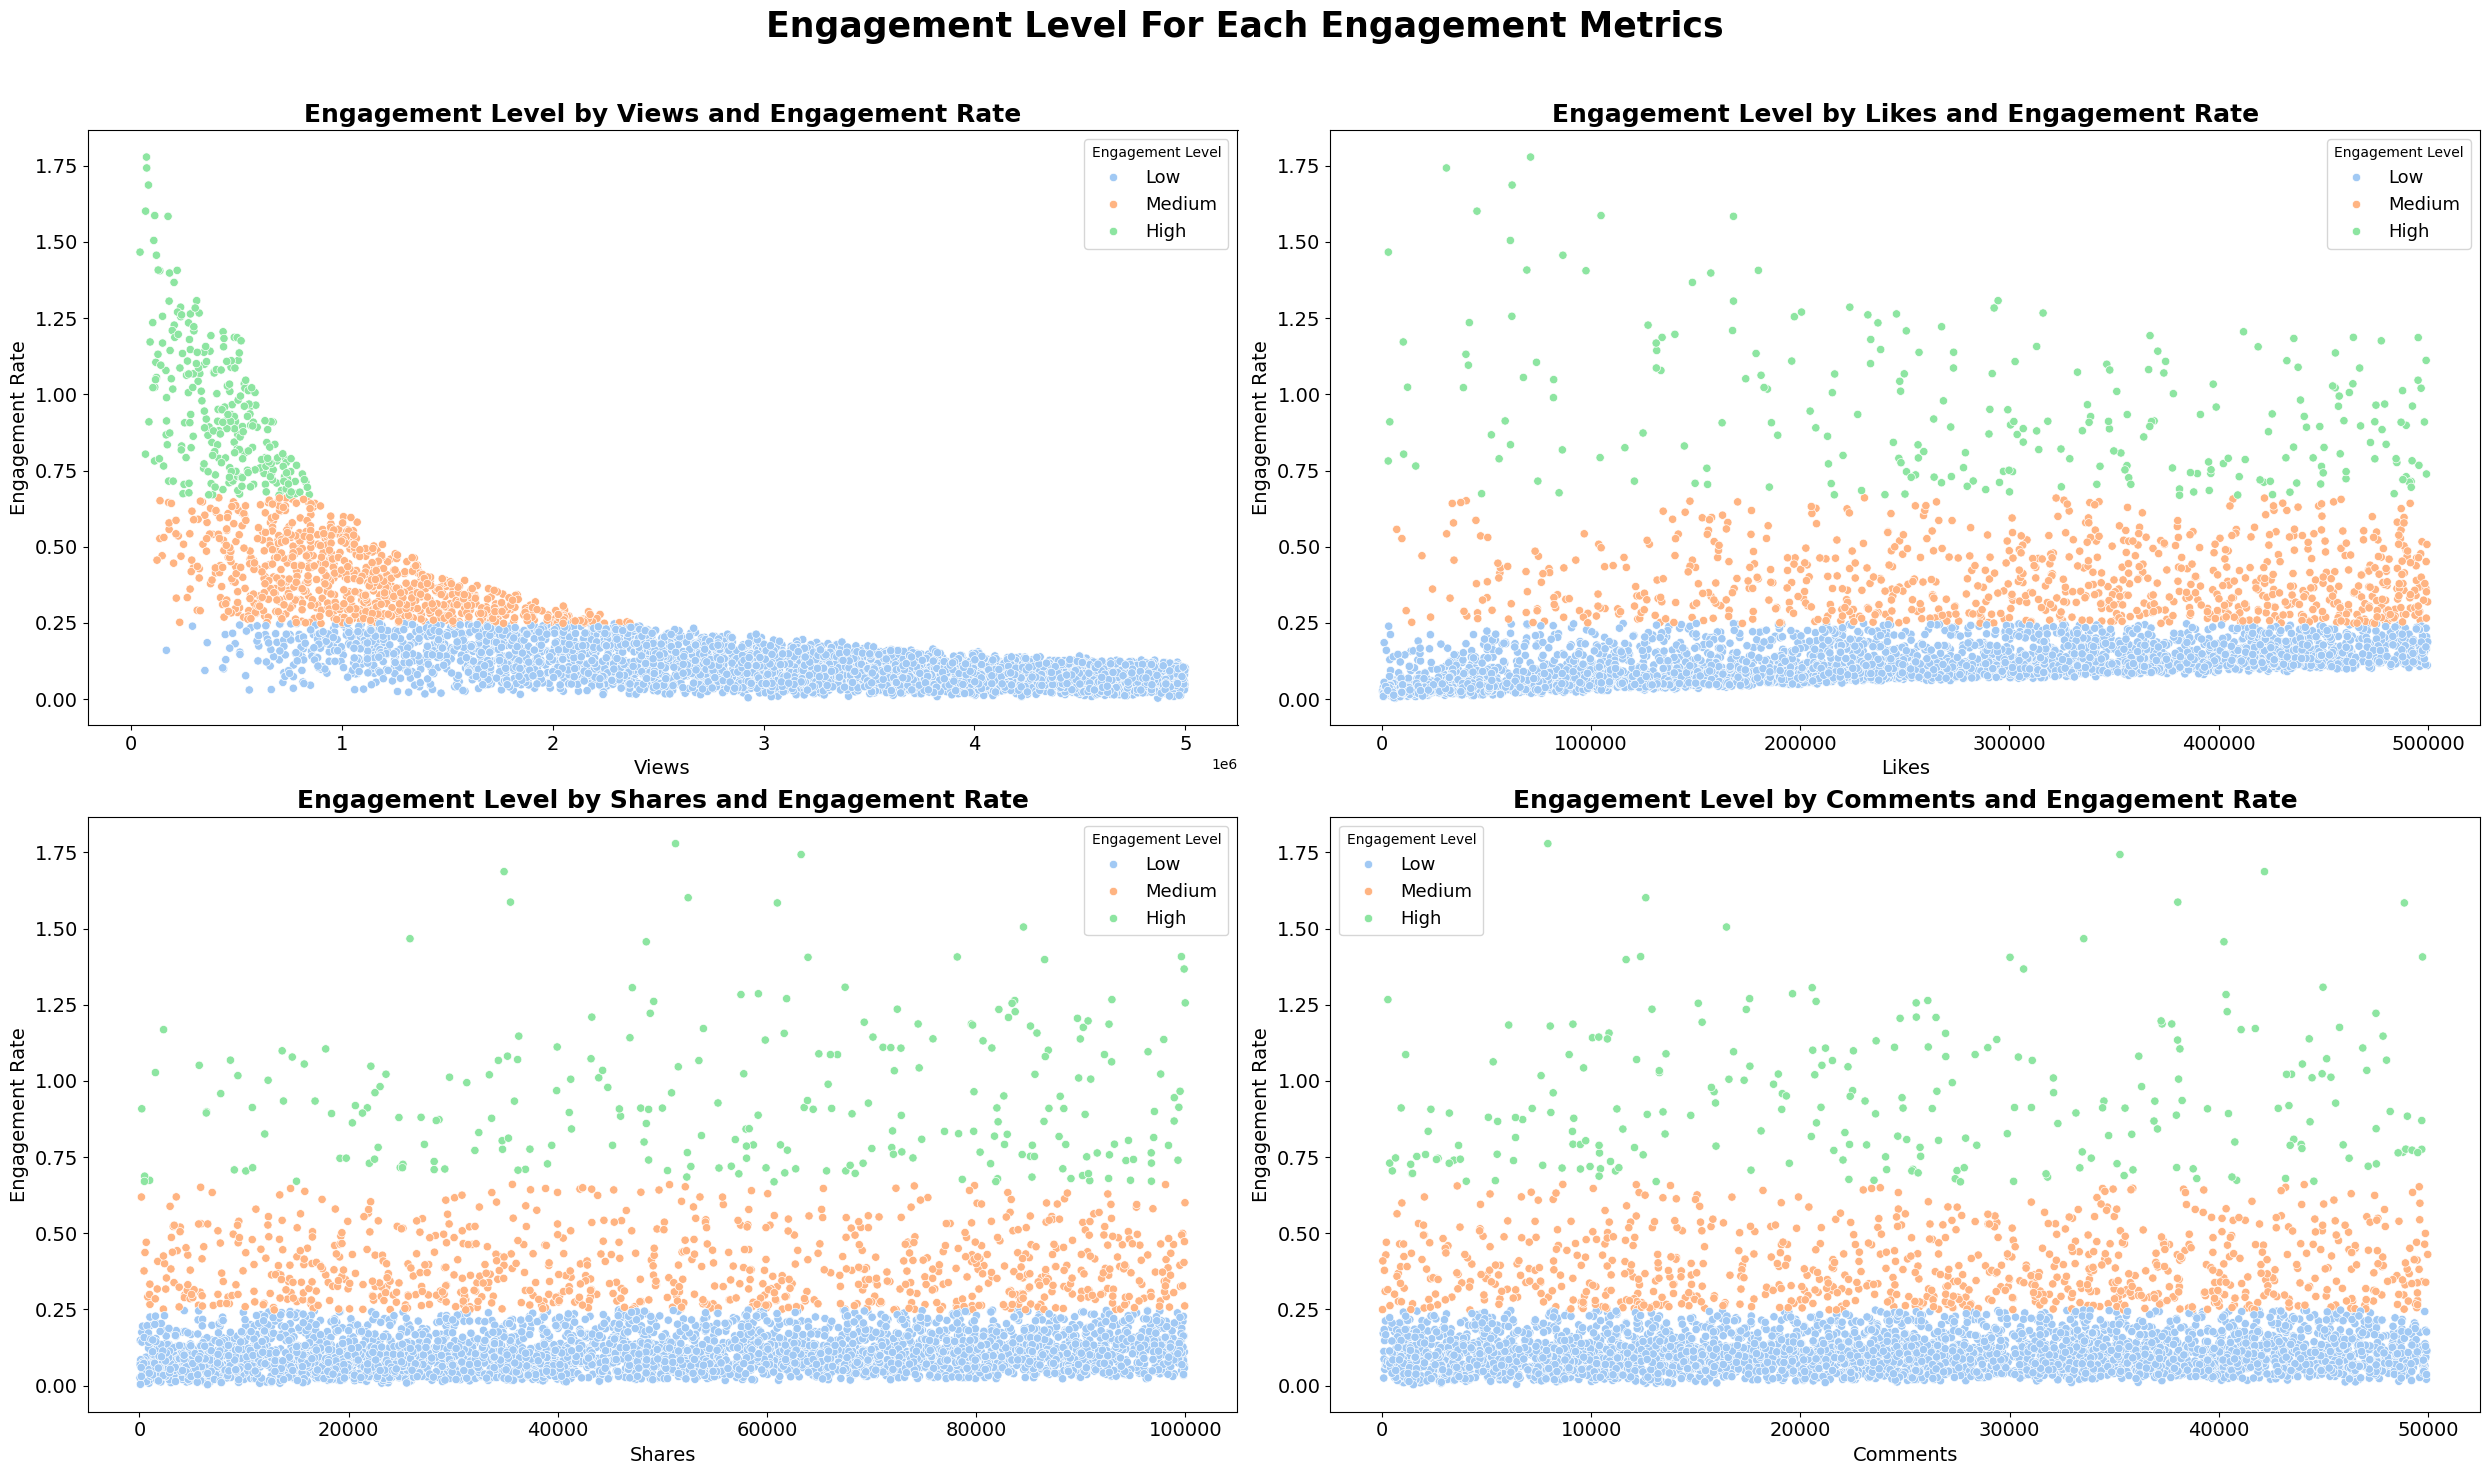

In [50]:
# Membuat function untuk Scatter Plot

def scatter_plot(df, numeric_columns):

    plt.figure(figsize=(25,15))

    for i, col in enumerate(numeric_columns,1):

        plt.subplot(2,2,i)
        scatter = sns.scatterplot(data = df,
                                  x = col,
                                  y = 'Engagement_Rate',
                                  hue = 'Engagement_Rate_Level',
                                  palette= 'pastel')
        
        plt.title(f'Engagement Level by {col} and Engagement Rate', fontsize = 18, fontweight = 'bold')
        plt.xlabel(col, fontsize = 14)
        plt.ylabel('Engagement Rate', fontsize = 14)

        plt.xticks(fontsize = 14)
        plt.yticks(fontsize = 14)

        handles, labels = scatter.get_legend_handles_labels()
        custom_label = ['Low', 'Medium', 'High']
        plt.legend(handles=handles[0:], 
                   labels=custom_label, 
                   title='Engagement Level',
                   fontsize = 13)

    plt.suptitle('Engagement Level For Each Engagement Metrics', fontsize = 25, fontweight = 'bold')

    plt.tight_layout()

    plt.savefig('Engagement Level For Each Engagement Metrics.png', dpi = 300)
        
    plt.subplots_adjust(top=0.9)
    plt.show()

scatter_plot(df_filtered, numeric_columns)

        

# Split Data

Membagi data ke data training & data uji

In [51]:
df_x = df_filtered[numeric_columns]
df_y = df_filtered['Engagement_Rate_Level']

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size= 0.25, stratify= df_y, random_state= 42)

In [52]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3547, 4), (1183, 4), (3547,), (1183,))

In [53]:
print(y_train.value_counts())

Engagement_Rate_Level
0    2732
1     626
2     189
Name: count, dtype: int64


#### Karena variabel target datanya imbalanced, maka melakukan teknik SMOTE untuk resampling (Agar variabel target balanced)

In [54]:
smote = SMOTE(random_state=42)

x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [55]:
# Validasi
print(f'Jumlah kategori variabel target setelah resampling: {y_train_resampled.value_counts(dropna=False)}')

Jumlah kategori variabel target setelah resampling: Engagement_Rate_Level
0    2732
1    2732
2    2732
Name: count, dtype: int64


# Decision Tree

In [56]:
decision_tree = DecisionTreeClassifier(random_state=42) # Membuat Model
decision_tree.fit(x_train, y_train)


DecisionTreeClassifier(random_state=42)

In [57]:
y_pred_dt = decision_tree.predict(x_test)

In [58]:
def feature_importance(model):

    importance = model.feature_importances_

    df_importance = pd.DataFrame(importance,
                                 index = df_x.columns,
                                 columns = ['Importance_Score']).sort_values(by = ['Importance_Score'], ascending= False)
    
    return df_importance

In [59]:
def barplot_feature_importance(data, col_value, model_name):

    plt.figure(figsize=(12,6))

    ax = sns.barplot(data = data,
                x = data.index,
                y = col_value,
                hue = data.index,
                palette= 'pastel')
    
    plt.title(f'{model_name}: Feature Importance', fontsize = 16, fontweight = 'bold')
    plt.ylabel('Importance Score')
    plt.xlabel('Feature Names')

    for container in ax.containers:
        ax.bar_label(container, fmt= '%.2f', label_type= 'edge', padding= 3, fontsize = 10)

    plt.tight_layout()

    plt.show()


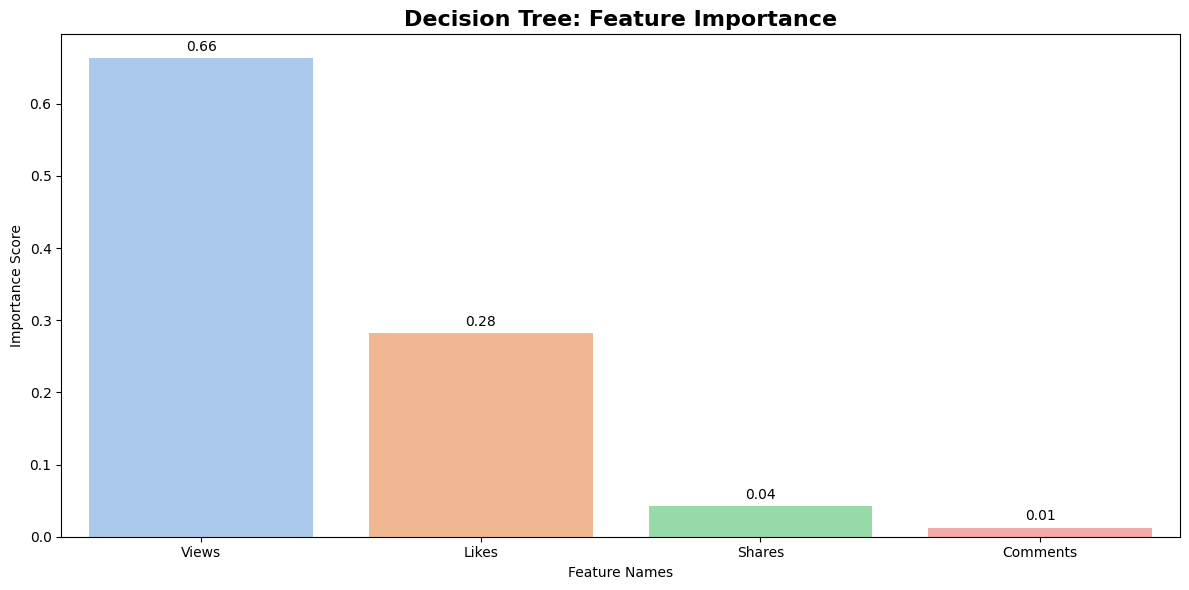

In [60]:
decision_tree_importance = feature_importance(decision_tree)

barplot_feature_importance(decision_tree_importance, 'Importance_Score', 'Decision Tree')

## Resampled

In [61]:
# Membuat Model dengan menggunakan data resample
decision_tree_resampled = DecisionTreeClassifier(random_state=42)
decision_tree_resampled.fit(x_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [62]:
y_pred_dt_resample = decision_tree_resampled.predict(x_test)

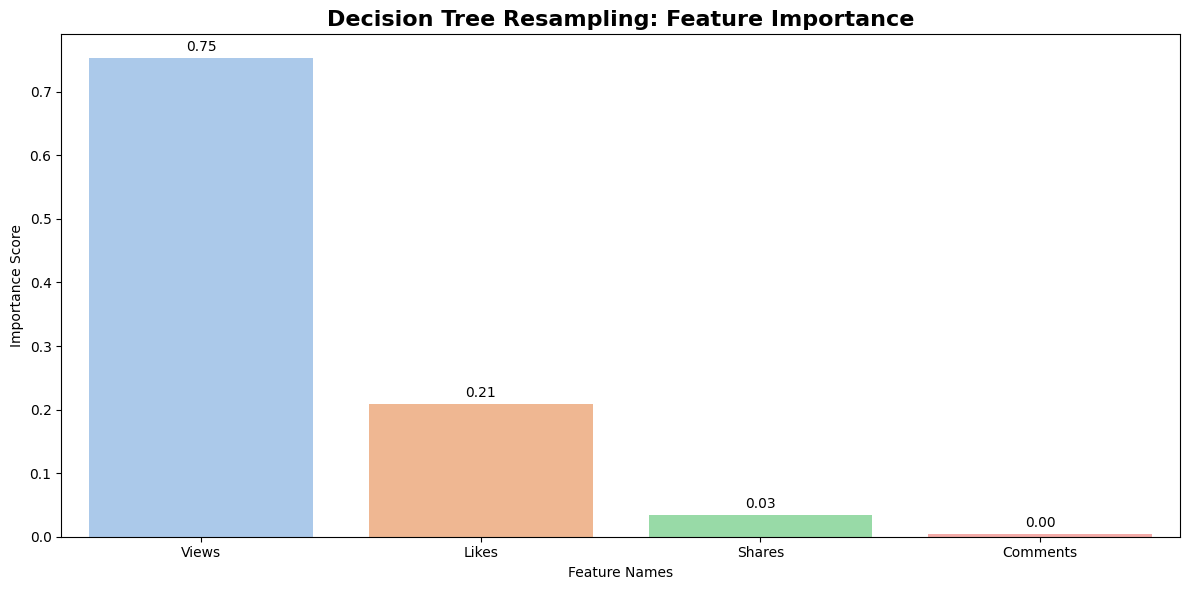

In [63]:
decision_tree_importance_resampled = feature_importance(decision_tree_resampled)

barplot_feature_importance(decision_tree_importance_resampled, 'Importance_Score', 'Decision Tree Resampling')

#### Melihat perbedaan antara model Decision Tree tanpa SMOTE dan model dengan SMOTE

In [64]:
# Membuat function untuk membuat Confusion Matrix

def conf_matrix_disp(model, y_val, x_val, model_name):

    y_pred_model = model.predict(x_val)

    cm = confusion_matrix(y_true= y_val,
                          y_pred = y_pred_model,
                          labels= model.classes_)
    
    disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= model.classes_)

    plt.figure(figsize=(8,6))

    disp.plot()

    plt.title(f'{model_name} Confusion Matrix')

    plt.savefig(f'{model_name} - Confusion Matrix.png', dpi = 300)

    plt.show()

Confusion Matrix tanpa Resampling


<Figure size 800x600 with 0 Axes>

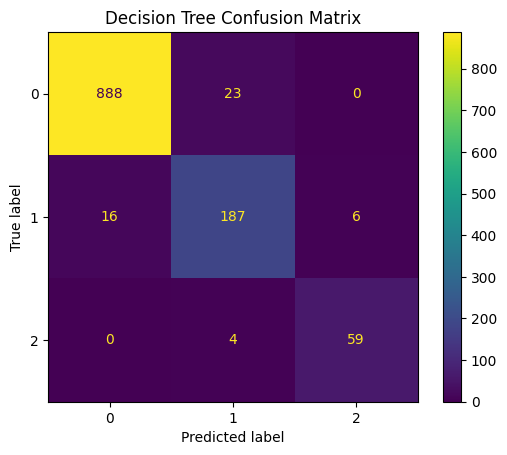

Confusion Matrix Resampling (SMOTE)


<Figure size 800x600 with 0 Axes>

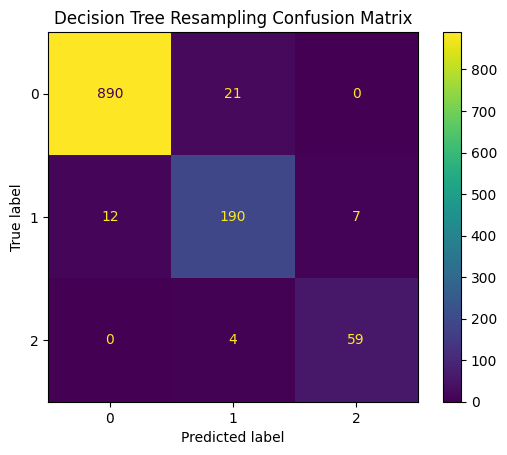

In [65]:
print('Confusion Matrix tanpa Resampling')
conf_matrix_disp(decision_tree, y_test, x_test, 'Decision Tree') # Tanpa SMOTE
print('Confusion Matrix Resampling (SMOTE)')
conf_matrix_disp(decision_tree_resampled, y_test, x_test, 'Decision Tree Resampling') # SMOTE

In [66]:
target_names = ['Low', 'Medium', 'High']

print('Nilai Model tanpa Resampling')
print(classification_report(y_test, y_pred_dt, target_names= target_names)) # Tanpa SMOTE
print('\n')
print('Nilai Model Resampling (SMOTE)')
print(classification_report(y_test, y_pred_dt_resample, target_names= target_names)) # SMOTE


Nilai Model tanpa Resampling
              precision    recall  f1-score   support

         Low       0.98      0.97      0.98       911
      Medium       0.87      0.89      0.88       209
        High       0.91      0.94      0.92        63

    accuracy                           0.96      1183
   macro avg       0.92      0.94      0.93      1183
weighted avg       0.96      0.96      0.96      1183



Nilai Model Resampling (SMOTE)
              precision    recall  f1-score   support

         Low       0.99      0.98      0.98       911
      Medium       0.88      0.91      0.90       209
        High       0.89      0.94      0.91        63

    accuracy                           0.96      1183
   macro avg       0.92      0.94      0.93      1183
weighted avg       0.96      0.96      0.96      1183



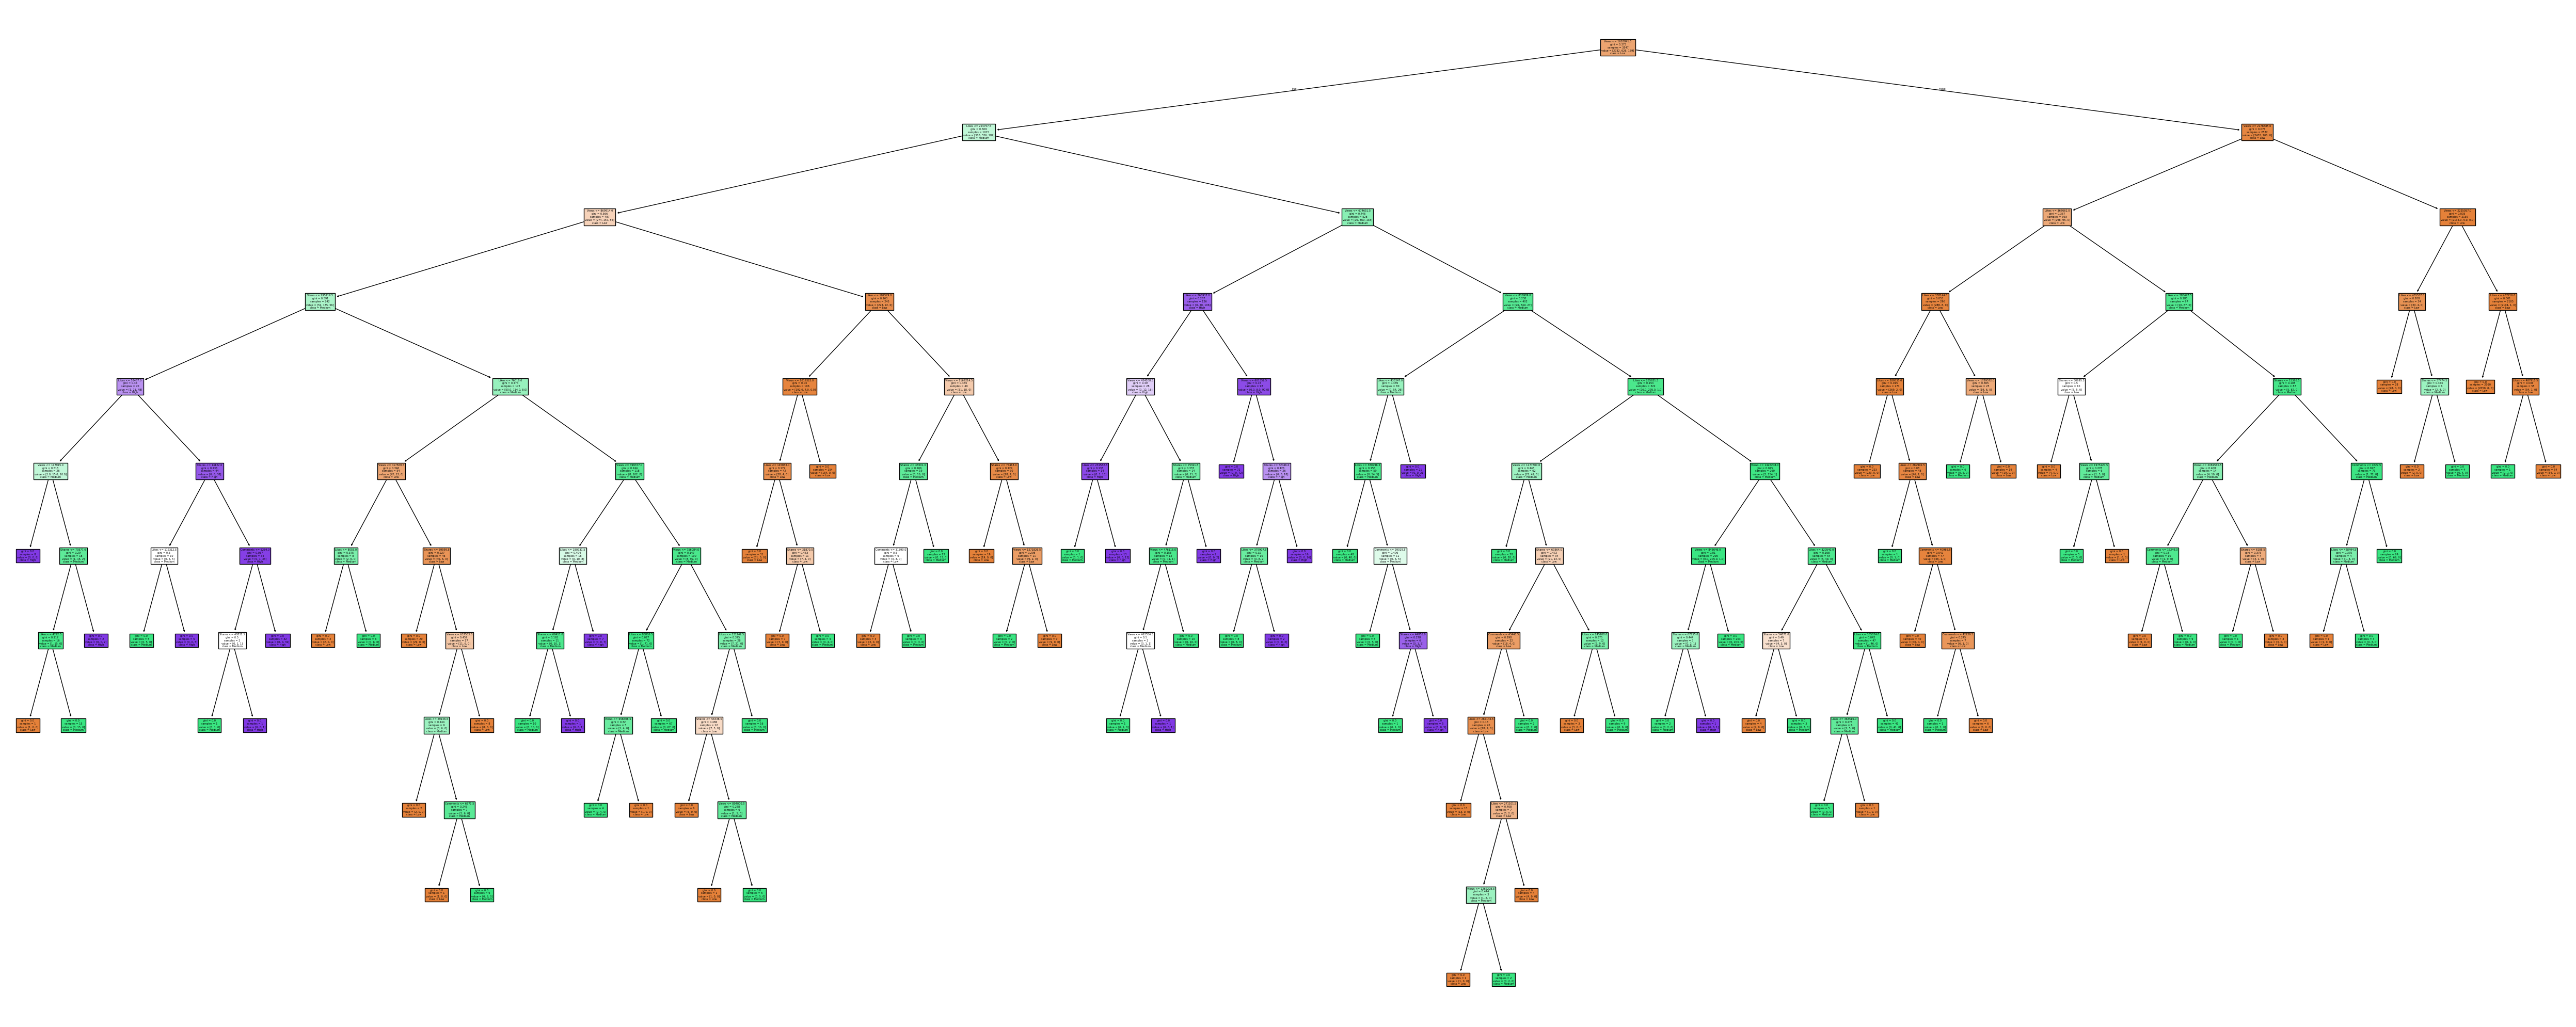

In [67]:
plt.figure(figsize= (50,20))

plot_tree(decision_tree= decision_tree,
          feature_names= df_x.columns,
          class_names= {0 : 'Low', 1 : 'Medium', 2 : 'High'},
          filled= True)

plt.tight_layout()

plt.savefig("Decision Tree Plot.png", dpi=300)

plt.show()

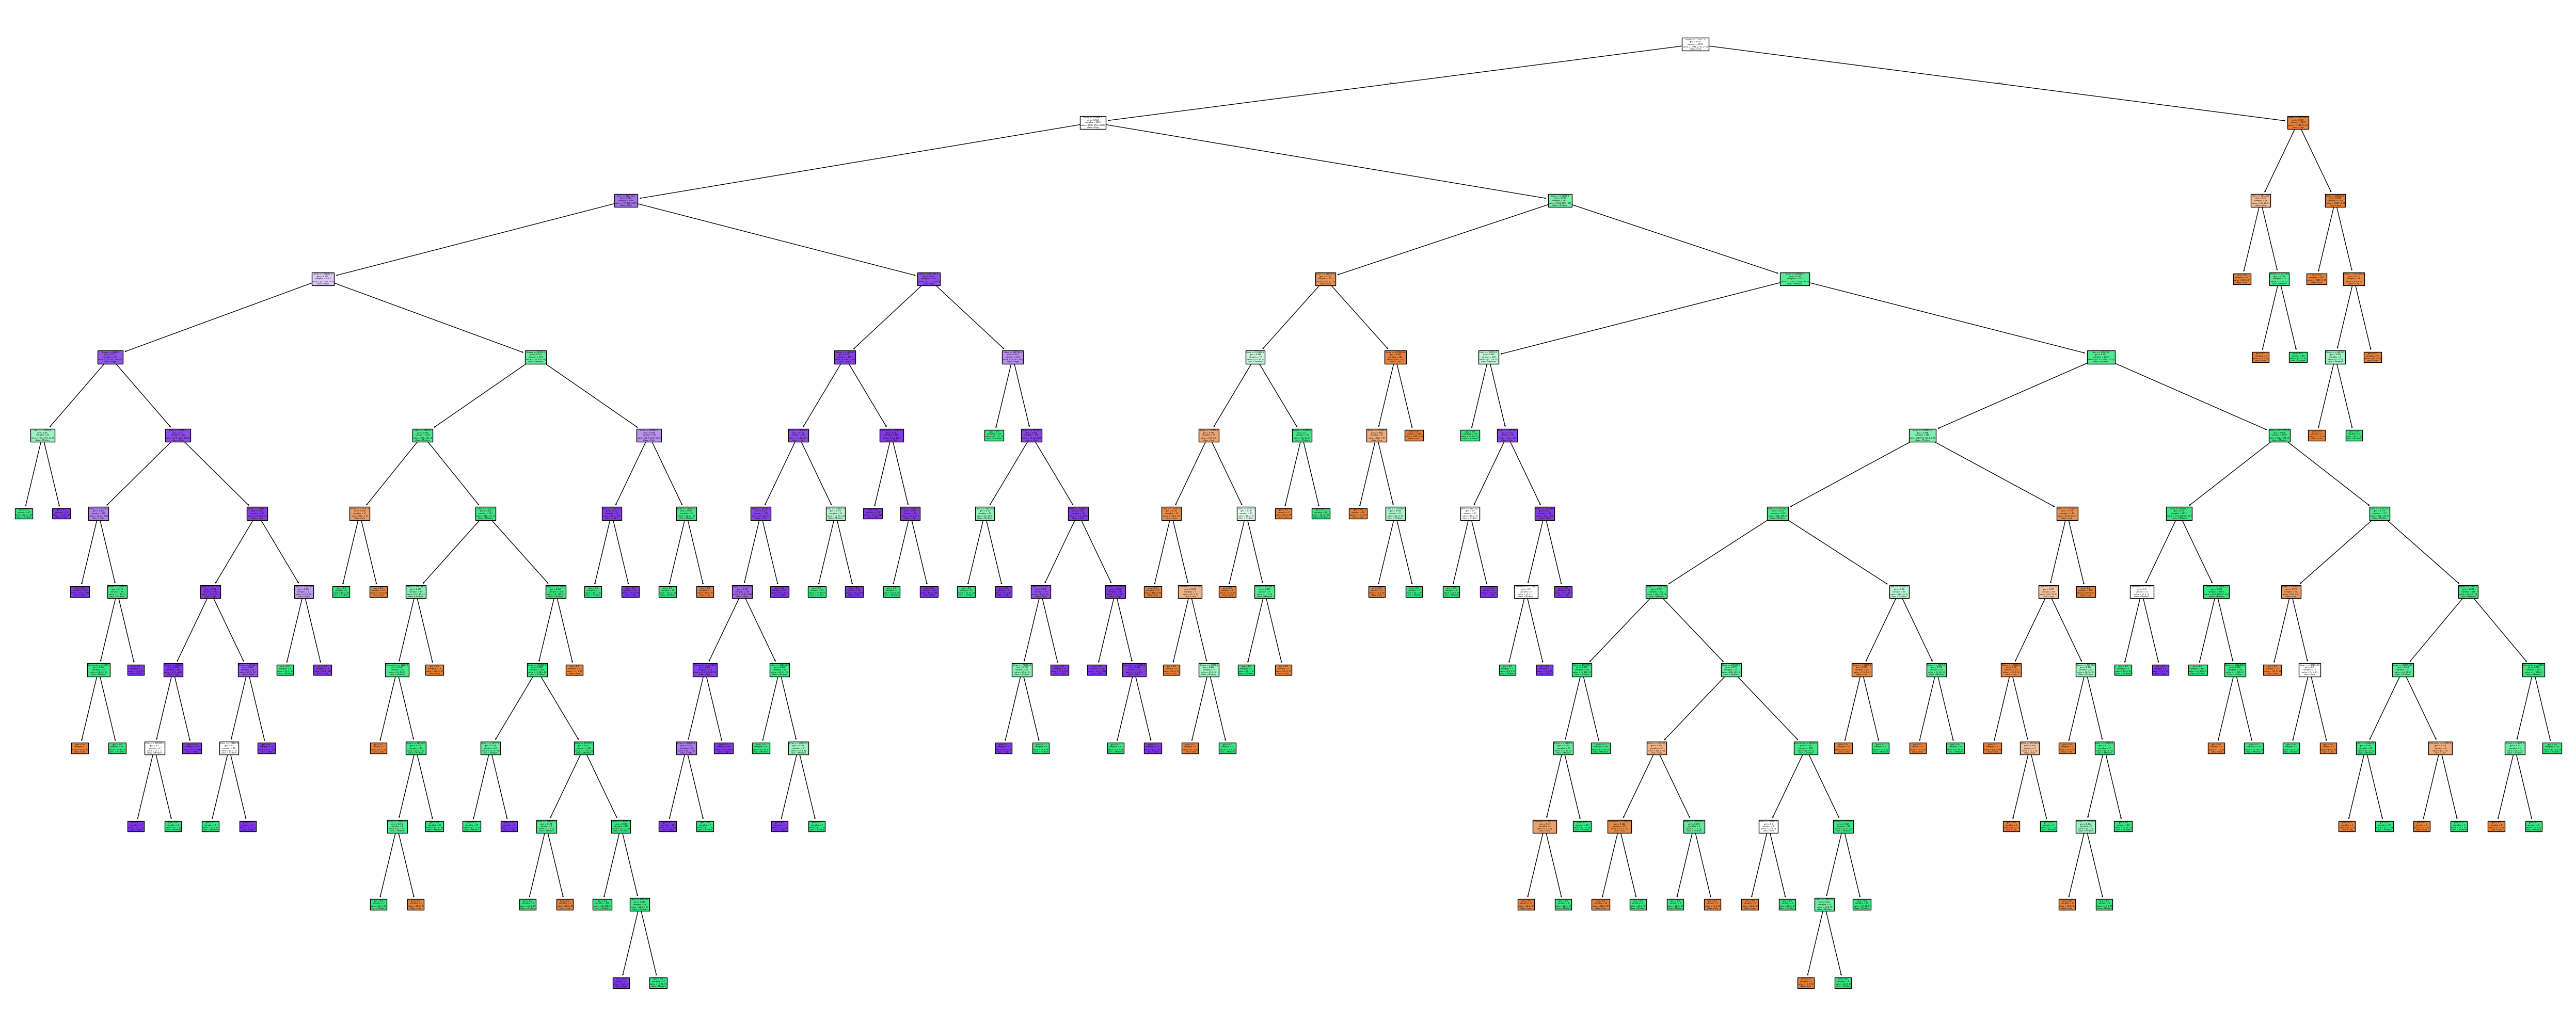

In [68]:
plt.figure(figsize= (50,20))

plot_tree(decision_tree= decision_tree_resampled,
          feature_names= df_x.columns,
          class_names= {0 : 'Low', 1 : 'Medium', 2 : 'High'},
          filled= True)

plt.tight_layout()

plt.savefig("Decision Tree Resampling Plot.png", dpi=300)

plt.show()

# XGBoost

In [69]:
xgb = XGBClassifier(objective= 'multi:softmax', random_state = 42)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [70]:
y_pred_xgb = xgb.predict(x_test)

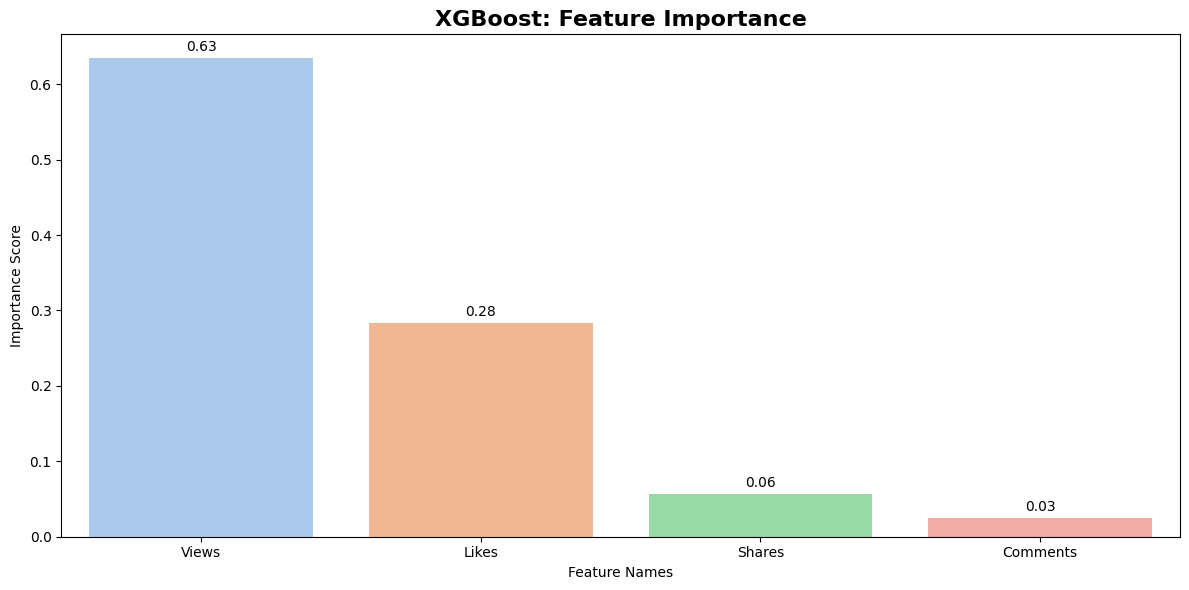

In [71]:
xgboost_importance = feature_importance(xgb)

barplot_feature_importance(xgboost_importance, 'Importance_Score', 'XGBoost')

## Resampled

In [72]:
xgb_resampled = XGBClassifier(objective= 'multi:softmax', random_state = 42)
xgb_resampled.fit(x_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [73]:
y_pred_xgb_resampled = xgb_resampled.predict(x_test)

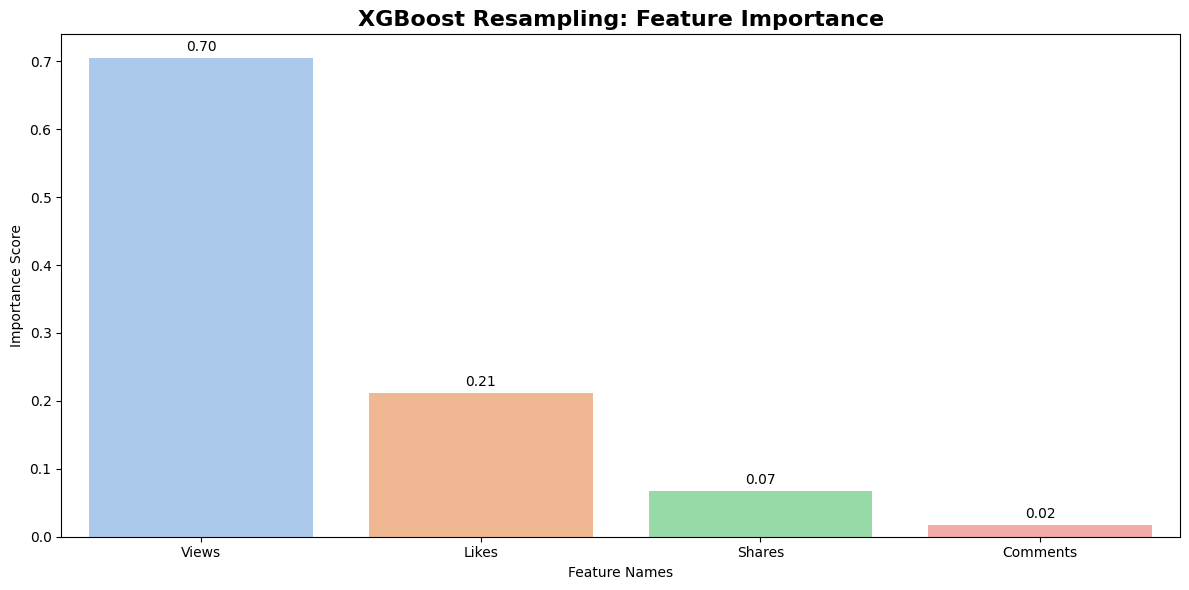

In [74]:
xgb_resampled_importance = feature_importance(xgb_resampled)

barplot_feature_importance(xgb_resampled_importance, 'Importance_Score', 'XGBoost Resampling')

Confusion Matrix tanpa Resampling


<Figure size 800x600 with 0 Axes>

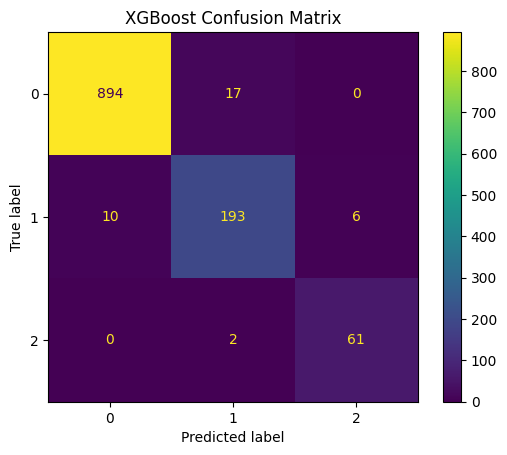

Confusion Matrix dengan Resampling


<Figure size 800x600 with 0 Axes>

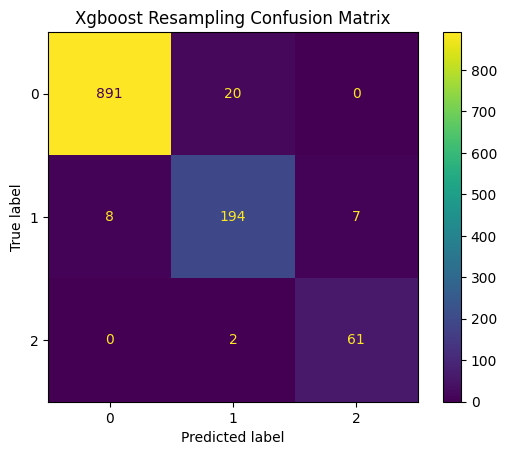

In [75]:
print('Confusion Matrix tanpa Resampling')
conf_matrix_disp(model= xgb, y_val= y_test, x_val= x_test, model_name= 'XGBoost')
print('Confusion Matrix dengan Resampling')
conf_matrix_disp(model= xgb_resampled,y_val= y_test,x_val= x_test, model_name= 'Xgboost Resampling')

In [76]:
print('Nilai Model tanpa Resampling')
print('\n')
print(classification_report(y_test, y_pred_xgb, target_names= target_names))
print('Nilai Model dengantanpa Resampling')
print('\n')
print(classification_report(y_test, y_pred_xgb_resampled, target_names= target_names))

Nilai Model tanpa Resampling


              precision    recall  f1-score   support

         Low       0.99      0.98      0.99       911
      Medium       0.91      0.92      0.92       209
        High       0.91      0.97      0.94        63

    accuracy                           0.97      1183
   macro avg       0.94      0.96      0.95      1183
weighted avg       0.97      0.97      0.97      1183

Nilai Model dengantanpa Resampling


              precision    recall  f1-score   support

         Low       0.99      0.98      0.98       911
      Medium       0.90      0.93      0.91       209
        High       0.90      0.97      0.93        63

    accuracy                           0.97      1183
   macro avg       0.93      0.96      0.94      1183
weighted avg       0.97      0.97      0.97      1183



# Random Forest

In [77]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(x_train, y_train)

y_pred_rf = random_forest.predict(x_test)

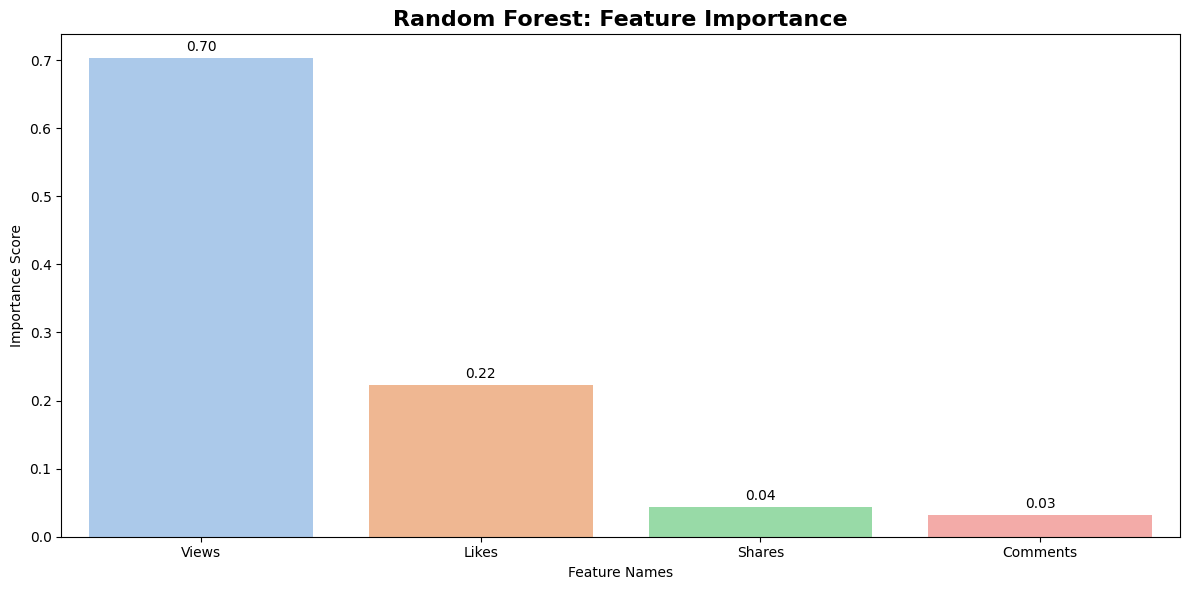

In [78]:
random_forest_importance = feature_importance(random_forest)

barplot_feature_importance(random_forest_importance, 'Importance_Score', 'Random Forest')

## Resampled

In [79]:
random_forest_resampled = RandomForestClassifier(random_state=42)
random_forest_resampled.fit(x_train_resampled, y_train_resampled)

y_pred_rf_resampled = random_forest_resampled.predict(x_test)

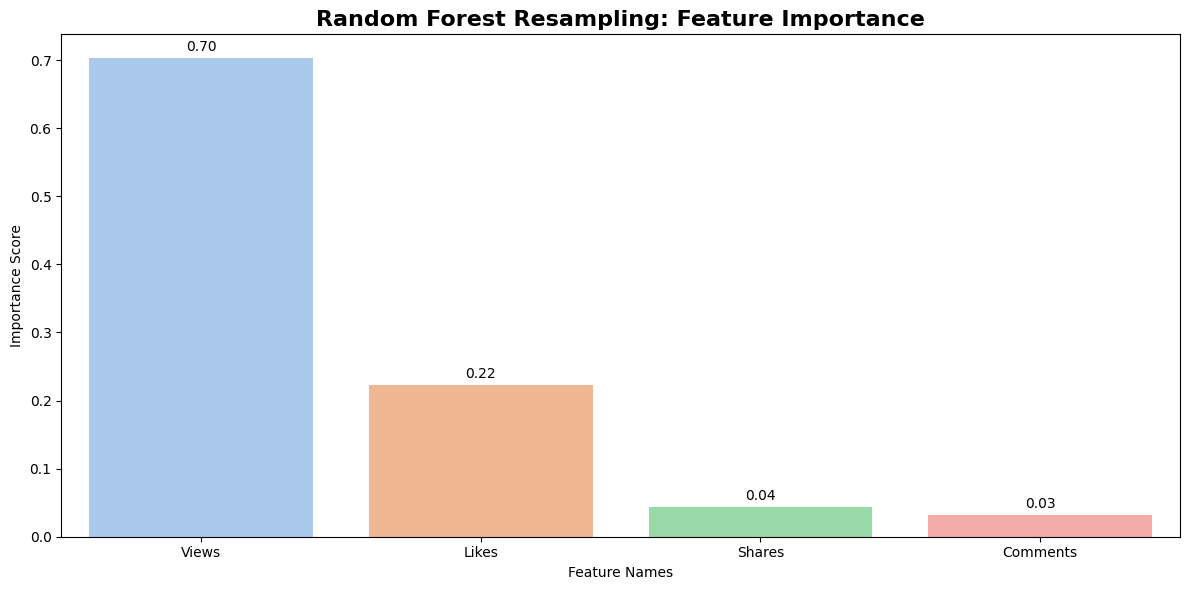

In [80]:
random_forest_importance_resampled = feature_importance(random_forest)

barplot_feature_importance(random_forest_importance_resampled, 'Importance_Score', 'Random Forest Resampling')

Confusion Matrix tanpa Resampling


<Figure size 800x600 with 0 Axes>

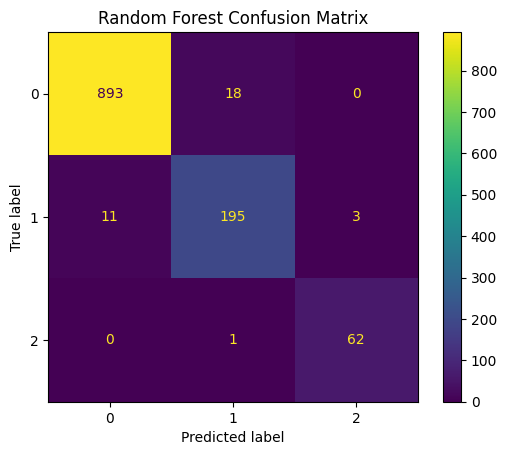

Confusion Matrix dengan Resampling


<Figure size 800x600 with 0 Axes>

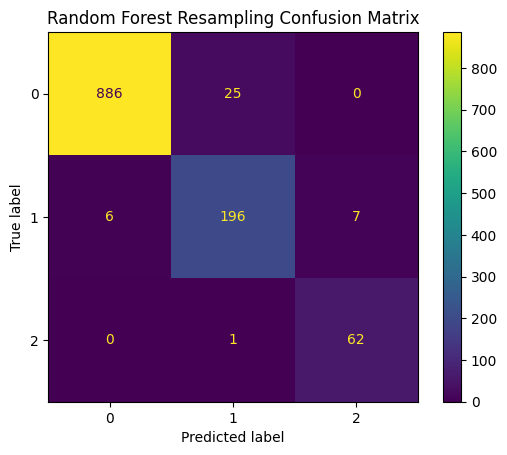

In [81]:
print('Confusion Matrix tanpa Resampling')
conf_matrix_disp(model = random_forest, y_val= y_test, x_val = x_test, model_name= 'Random Forest')
print('Confusion Matrix dengan Resampling')
conf_matrix_disp(model = random_forest_resampled, y_val= y_test, x_val = x_test, model_name= 'Random Forest Resampling')

In [82]:
print('Nilai Model tanpa Resampling')
print('\n')
print(classification_report(y_test, y_pred_rf, target_names= target_names))
print('Nilai Model dengan Resampling')
print('\n')
print(classification_report(y_test, y_pred_rf_resampled, target_names= target_names))

Nilai Model tanpa Resampling


              precision    recall  f1-score   support

         Low       0.99      0.98      0.98       911
      Medium       0.91      0.93      0.92       209
        High       0.95      0.98      0.97        63

    accuracy                           0.97      1183
   macro avg       0.95      0.97      0.96      1183
weighted avg       0.97      0.97      0.97      1183

Nilai Model dengan Resampling


              precision    recall  f1-score   support

         Low       0.99      0.97      0.98       911
      Medium       0.88      0.94      0.91       209
        High       0.90      0.98      0.94        63

    accuracy                           0.97      1183
   macro avg       0.92      0.96      0.94      1183
weighted avg       0.97      0.97      0.97      1183



# Logistic Regression

In [83]:
logistic_reg = LogisticRegression(random_state=42, max_iter= 1000)
logistic_reg.fit(x_train, y_train)

y_pred_reg = logistic_reg.predict(x_test)

## Resampled

In [84]:
logistic_reg_resampled = LogisticRegression(random_state=42, max_iter= 1000)
logistic_reg_resampled.fit(x_train_resampled, y_train_resampled)

y_pred_reg_resampled = logistic_reg_resampled.predict(x_test)

Confusion Matrix tanpa Resampling


<Figure size 800x600 with 0 Axes>

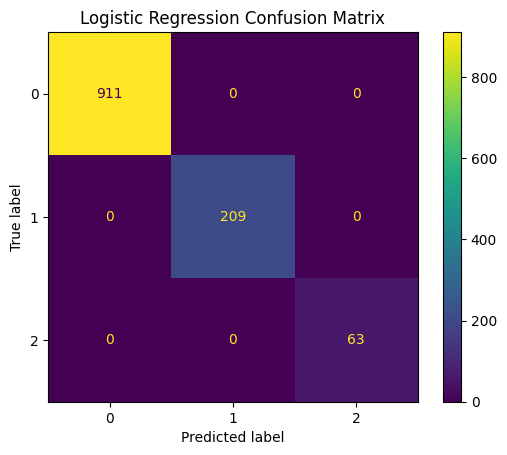

Confusion Matrix dengan Resampling


<Figure size 800x600 with 0 Axes>

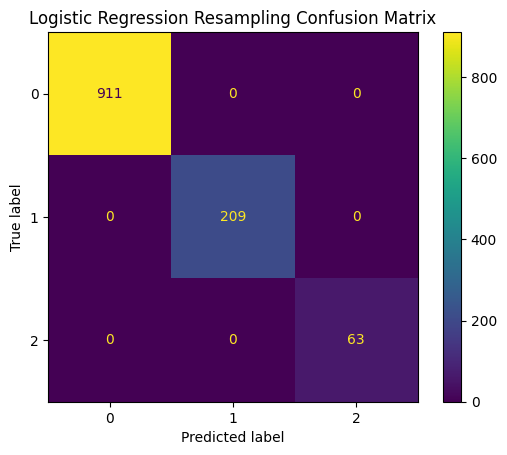

In [85]:
print('Confusion Matrix tanpa Resampling')
conf_matrix_disp(model = logistic_reg,
                 y_val= y_test,
                 x_val= x_test,
                 model_name= 'Logistic Regression')
print('Confusion Matrix dengan Resampling')
conf_matrix_disp(model = logistic_reg_resampled,
                 y_val= y_test,
                 x_val= x_test,
                 model_name= 'Logistic Regression Resampling')

In [86]:
print('Nilai Model tanpa Resampling')
print('\n')
print(classification_report(y_true= y_test,
                            y_pred= y_pred_reg,
                            target_names= target_names))
print('Nilai Model dengan Resampling')
print('\n')
print(classification_report(y_true= y_test,
                            y_pred= y_pred_reg_resampled,
                            target_names= target_names))

Nilai Model tanpa Resampling


              precision    recall  f1-score   support

         Low       1.00      1.00      1.00       911
      Medium       1.00      1.00      1.00       209
        High       1.00      1.00      1.00        63

    accuracy                           1.00      1183
   macro avg       1.00      1.00      1.00      1183
weighted avg       1.00      1.00      1.00      1183

Nilai Model dengan Resampling


              precision    recall  f1-score   support

         Low       1.00      1.00      1.00       911
      Medium       1.00      1.00      1.00       209
        High       1.00      1.00      1.00        63

    accuracy                           1.00      1183
   macro avg       1.00      1.00      1.00      1183
weighted avg       1.00      1.00      1.00      1183



In [87]:
def results_model(model_name, model, X_val, y_val):
    y_pred = model.predict(X_val)
    
    results = {
        'Model': [model_name],
        'F1': [f1_score(y_val, y_pred, average='weighted')],
        'Recall': [recall_score(y_val, y_pred, average= 'weighted')],
        'Precision': [precision_score(y_val, y_pred, average= 'weighted')],
        'Accuracy': [accuracy_score(y_val, y_pred)]
    }
    
    return pd.DataFrame(results)


# Tanpa SMOTE (Resampling)
logreg_results = results_model('Logistic Regression', logistic_reg_resampled, x_test, y_test)
random_forest_results = results_model('Random Forest', random_forest_resampled, x_test, y_test)
XGBoost_results = results_model('XGBoost', xgb_resampled, x_test, y_test)
decision_tree_results = results_model('Decision Tree', decision_tree, x_test, y_test)


# Menggunakan SMOTE (Resampling)
logreg_results_resampled = results_model('Logistic Regression Resampled', logistic_reg_resampled, x_test, y_test)
random_forest_results_resampled = results_model('Random Forest Resampled', random_forest_resampled, x_test, y_test)
XGBoost_results_resampled = results_model('XGBoost Resampled', xgb_resampled, x_test, y_test)
decision_tree_results_resampled = results_model('Decision Tree Resampled', decision_tree_resampled, x_test, y_test)

model_results = pd.concat([logreg_results, random_forest_results, XGBoost_results, decision_tree_results,
                           logreg_results_resampled, random_forest_results_resampled, XGBoost_results_resampled, decision_tree_results_resampled],
                            axis= 0, 
                            ignore_index= True).sort_values('Accuracy', ascending= False).reset_index(drop=True)

model_results

Model   F1  Recall  Precision  Accuracy
0            Logistic Regression 1.00    1.00       1.00      1.00
1  Logistic Regression Resampled 1.00    1.00       1.00      1.00
2              XGBoost Resampled 0.97    0.97       0.97      0.97
3                        XGBoost 0.97    0.97       0.97      0.97
4        Random Forest Resampled 0.97    0.97       0.97      0.97
5                  Random Forest 0.97    0.97       0.97      0.97
6        Decision Tree Resampled 0.96    0.96       0.96      0.96
7                  Decision Tree 0.96    0.96       0.96      0.96

#### Kesimpulan

Setelah membandingkan model tanpa resampling dengan model yang menggunakan resampling (SMOTE), dapat disimpulkan bahwa penerapan SMOTE tidak memberikan peningkatan yang signifikan terhadap performa model. Secara metrik evaluasi seperti f1-score, precision, recall, dan accuracy, nilai yang dihasilkan cenderung stagnan atau bahkan sedikit menurun. Hal ini terlihat jelas pada confusion matrix, di mana model dengan data resampling menunjukkan penurunan kemampuan dalam mengenali kelas Low.

Model terbaik dari dataset ini diperoleh menggunakan algoritma Logistic Regression, dengan hasil yang sangat baik, yaitu f1-score, recall, precision, dan accuracy sebesar 1.0 atau 100%. Model ini dapat dimanfaatkan untuk memprediksi performa postingan selanjutnya berdasarkan perhitungan engagement rate secara akurat dan konsisten.

In [88]:
df_model = x_test.copy()

df_model['Actual'] = y_test
df_model['Decision_Tree_Predict'] = y_pred_dt
df_model['Random_Forest_Predict'] = y_pred_rf
df_model['XGBoost_Predict'] = y_pred_xgb
df_model['Logistic_Predict'] = y_pred_reg


df_model

Views   Likes  Shares  Comments  Actual  Decision_Tree_Predict  \
4850  4319494   83744   83078     26847       0                      0   
3424  4710683  186594   81646      5540       0                      0   
4454  3924268  498261    8499     11392       0                      0   
211   4764800   52536   65976     47528       0                      0   
1207  3521130  260136   65723     32176       0                      0   
...       ...     ...     ...       ...     ...                    ...   
3734  2260606  421644   22322     46373       0                      0   
3525   588026  462458   90944     38081       2                      2   
28    1653907   91836   77370      2823       0                      0   
4744  3702911   85206    4933     20680       0                      0   
1691  1586264  161483   51284     11309       0                      0   

      Random_Forest_Predict  XGBoost_Predict  Logistic_Predict  
4850                      0                0                 0  
3424                      0                0                 0  
4454                      0                0                 0  
211                       0                0                 0  
1207                      0                0                 0  
...                     ...              ...               ...  
3734                      0                0                 0  
3525                      2                2                 2  
28                        0                0                 0  
4744                      0                0                 0  
1691                      0                0                 0  

[1183 rows x 9 columns]

In [89]:
compare_df = pd.DataFrame({
    'Actual': df_model['Actual'].value_counts(),
    'Logistic': df_model['Logistic_Predict'].value_counts(),
    'Decision Tree': df_model['Decision_Tree_Predict'].value_counts(),
    'Random Forest': df_model['Random_Forest_Predict'].value_counts(),
    'XGBoost': df_model['XGBoost_Predict'].value_counts()
})

compare_df = compare_df.T

compare_df = compare_df.rename(columns={0 : 'Low', 1 : 'Medium', 2 : 'High'})

compare_df

Low  Medium  High
Actual         911     209    63
Logistic       911     209    63
Decision Tree  904     214    65
Random Forest  904     214    65
XGBoost        904     212    67

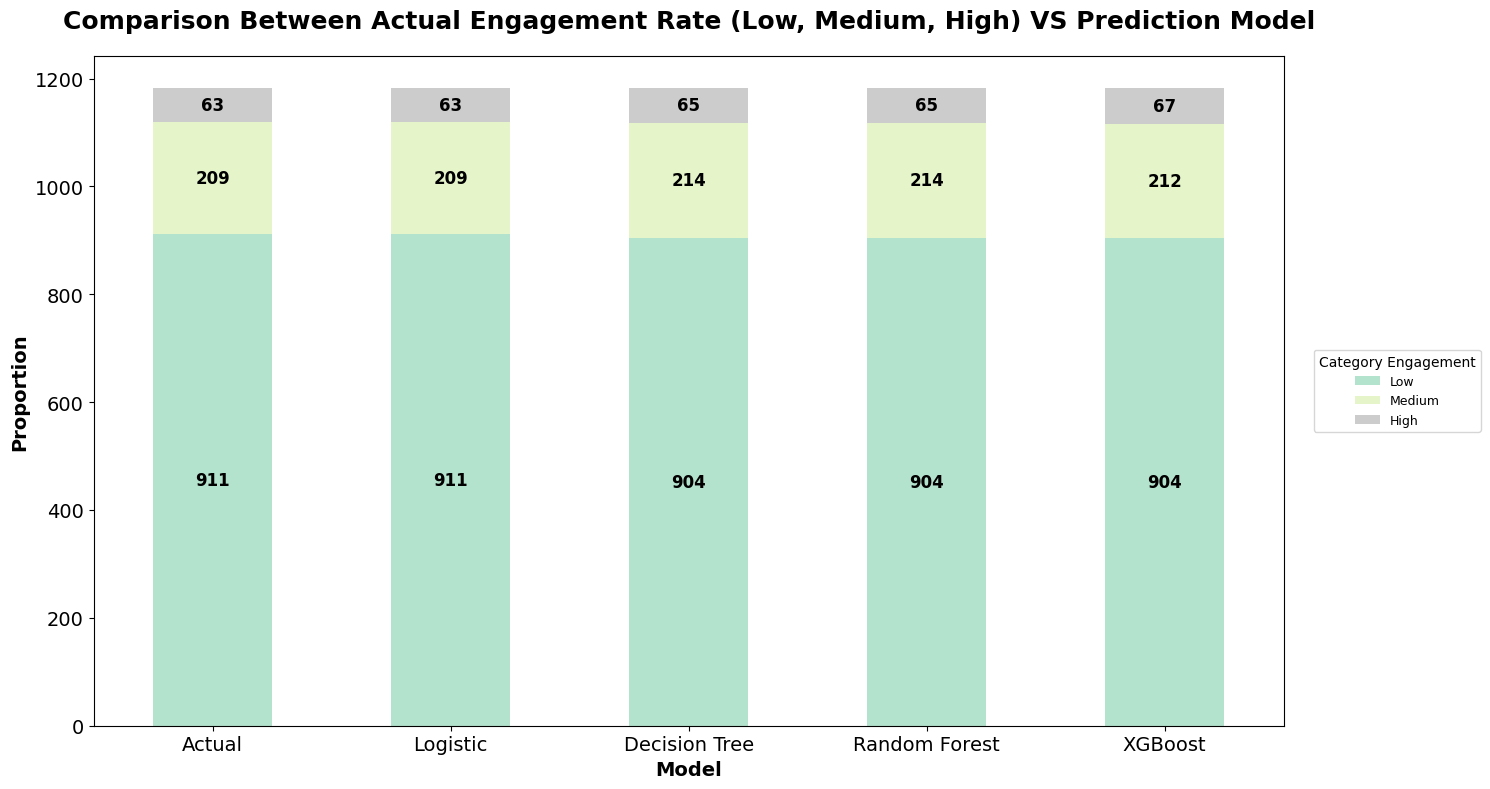

In [90]:
ax3 = compare_df.plot(kind = 'bar',
                figsize= (15,8),
                colormap= 'Pastel2',
                stacked= True)

plt.title('Comparison Between Actual Engagement Rate (Low, Medium, High) VS Prediction Model', fontsize = 18, fontweight = 'bold', pad= 20)
plt.xlabel('Model', fontsize = 14, fontweight = 'bold')
plt.ylabel('Proportion', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation = 0)
plt.legend(loc = 'center left', fontsize = 9, title = 'Category Engagement',  bbox_to_anchor=(1.02, 0.5))

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

for container in ax3.containers:
    ax3.bar_label(container, fmt = '%.0f', label_type= 'center', color = 'black', fontsize = 12, fontweight = 'bold')

plt.tight_layout()

plt.savefig('Comparison Between Actual Engagement Rate (Low, Medium, High) VS Prediction Model', dpi = 300)

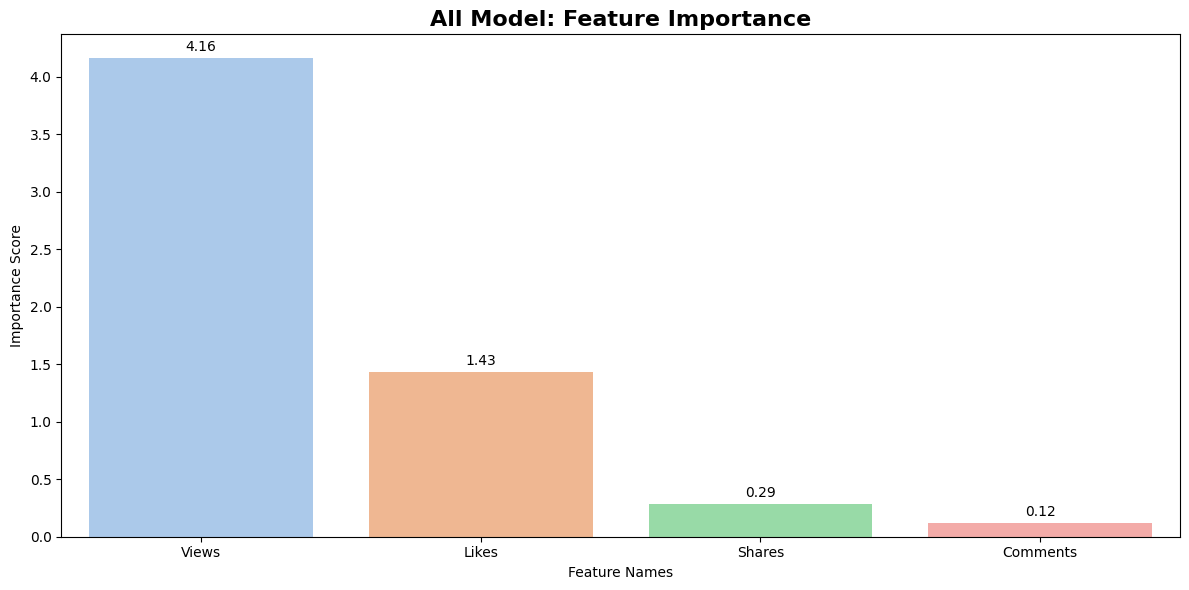

In [91]:
# Jumlahkan dan simpan dalam satu kolom
importance_combined = (decision_tree_importance.values.flatten() + decision_tree_importance_resampled.values.flatten() + 
                        random_forest_importance.values.flatten() + random_forest_importance_resampled.values.flatten() +
                        xgboost_importance.values.flatten() + xgb_resampled_importance.values.flatten()
                      )

# Buat dataframe baru dengan satu kolom
feature_importance_df = pd.DataFrame(importance_combined, 
                      index=df_x.columns, 
                      columns=['Importance_Score'])

barplot_feature_importance(feature_importance_df, 'Importance_Score', 'All Model')

# Rekomendasi 

Low Engagement (Cluster 0)

- Tambahkan Call-to-Action (CTA) yang jelas di caption, seperti ajakan untuk berkomentar atau membagikan.
- Perbaiki relevansi konten agar tidak hanya dilihat tapi juga mendorong respon emosional.
- Evaluasi kembali jenis konten yang hanya mengejar views tanpa value interaktif.

Medium Engagement (Cluster 1)

- Fokus pada peningkatan visual storytelling dan narasi konten.
- Gunakan elemen interaktif ringan seperti polling atau pertanyaan untuk menaikkan interaksi.
- Pertahankan format yang terbukti menarik dan lakukan iterasi kecil untuk meningkatkan respons audiens.

High Engagement (Cluster 2)

- Lanjutkan pola konten yang mendorong komentar, like, dan share meskipun views masih terbatas.
- Perluas jangkauan dengan kolaborasi, penggunaan hashtag yang tepat, atau optimasi waktu posting.
- Uji coba promosi organik atau berbayar ringan agar konten berkualitas tinggi menjangkau audiens lebih luas.